# background knowledge

In [78]:
# conda install -c conda-forge ydata-profiling
# pip install sketch
# conda install -c conda-forge pygwalker
# pip install mitosheet 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [6]:
df= pd.read_csv("Parkinson.csv")

## ydata_profiling

In [4]:
import ydata_profiling
from ydata_profiling import ProfileReport
report = ProfileReport(df,title="Profile Report")

In [5]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

***Notes***

    -Standard Deviation: A lower standard deviation indicates less variability in the data. For some binary classification problems, less variability might be preferred as it could make it easier for the model to discriminate between the two classes.
   
    -Coefficient of Variation (CV): A lower CV suggests more stability in the data. Again, this could be preferable in some cases where you want the feature to have consistent values for both classes.

    -Variance: Lower variance indicates less spread in the data, which can be beneficial if you want your feature to be stable and predictable
    

In [84]:
import sketch

# EXPLORATORY DATA ANALYSIS

In [7]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

    Our dataset is imbalanced because we have a significant difference in the number of samples between the two classes of your target variable, "status." In this case, "status" is binary with two values, 1 and 0. we have 147 samples with a status of 1 and only 48 samples with a status of 0.

    Imbalanced datasets can pose challenges when training machine learning models, as the model may become biased toward the majority class (in this case, class 1) due to having more data points
    
    we will later deal with this by , Resampling(Oversampling):

    Oversampling: Increase the number of instances in the minority class by duplicating existing samples or generating synthetic data points. Common techniques include SMOTE (Synthetic Minority Over-sampling Technique).


In [8]:
df.head(1)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654


In [9]:
df.head(20)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [10]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [11]:
df.shape

(195, 24)

In [12]:
df.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [13]:
# import matplotlib.pyplot as plt

# # Set figure size
# plt.figure(figsize=(12, 6))

# # Plot boxplot for each column in the dataframe
# df.boxplot()
# # Rotate x-axis labels
# plt.xticks(rotation=90)

# # Show the plot
# plt.show()


In [14]:
df["name"].nunique()

195

In [15]:
df.duplicated().sum()

0

In [16]:
df["name"].duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## Analying the correlation of our target column with other column  as it is most important task

In [18]:
df1 = df.copy()

In [19]:
df1.drop(columns=["name"] , inplace=True)

In [20]:
from scipy.stats import pointbiserialr
target_column = "status"
# Create a list to store the correlations
correlations = []

for feature in df1.columns:
    if feature != target_column:
        # Calculate point-biserial correlation
        corr, _ = pointbiserialr(df1[target_column], df1[feature])
        correlations.append({"Feature": feature, "Point-Biserial Correlation": corr})

# Create a DataFrame from the list of correlations
correlations_df = pd.DataFrame(correlations)
correlations_df.set_index("Feature" , inplace=True)
# Sort the correlations by their absolute values (optional)
correlations_df["Absolute Correlation"] = correlations_df["Point-Biserial Correlation"].abs()
correlations_df = correlations_df.sort_values(by="Absolute Correlation", ascending=False)

# Display the correlations
correlations_df

,Point-Biserial Correlation,Absolute Correlation
Feature,,
spread1,0.564838,0.564838
PPE,0.531039,0.531039
spread2,0.454842,0.454842
MDVP:Fo(Hz),-0.383535,0.383535
MDVP:Flo(Hz),-0.380200,0.380200
MDVP:Shimmer,0.367430,0.367430
MDVP:APQ,0.364316,0.364316
HNR,-0.361515,0.361515
Shimmer:APQ5,0.351148,0.351148


In [21]:
correlations_df.index

Index(['spread1', 'PPE', 'spread2', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Shimmer', 'MDVP:APQ', 'HNR', 'Shimmer:APQ5', 'MDVP:Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:DDA', 'D2', 'MDVP:Jitter(Abs)', 'RPDE',
       'MDVP:PPQ', 'MDVP:Jitter(%)', 'MDVP:RAP', 'Jitter:DDP', 'DFA', 'NHR',
       'MDVP:Fhi(Hz)'],
      dtype='object', name='Feature')

***Point-Biserial Correlation:*** The point-biserial correlation coefficient, which measures the strength and direction of the relationship between the binary target variable (1s and 0s) and the feature. This value ranges from -1 to 1, where positive values indicate a positive association with the target, and negative values indicate a negative association.


***Absolute Correlation:*** The absolute value of the point-biserial correlation, which shows the strength of the association regardless of its direction.


#### Here's what we infer from the result:

    -Strong Positive Associations: The features "spread1" and "PPE" have the highest positive point-biserial correlations of approximately 0.565 and 0.531, respectively. This suggests that as these features increase, the likelihood of the target variable being 1 (or True) also increases. These features are positively associated with the target variable
    
    -Strong Negative Associations: The features "MDVP:Fo(Hz)" and "MDVP:Flo(Hz)" have the highest negative point-biserial correlations of approximately -0.384 and -0.380, respectively. This indicates that as these features increase, the likelihood of the target variable being 0 (or False) increases. These features are negatively associated with the target variable.
    
    -Moderate Associations: Several other features have moderate point-biserial correlations, both positive and negative, with the target variable. Features like "MDVP:Shimmer," "MDVP:APQ," and "HNR" have positive associations, while "MDVP:Fhi(Hz)" has a negative association.
    
    -Weak Associations: Some features have weak associations (both positive and negative) with the target variable, as indicated by their correlation coefficients closer to 0. For example, "NHR" and "DFA" have relatively weak associations.







#### now , lets analyse correlation of other columns on each other (Multicoliearity check)

from the previously Point-Biserial Correlation , we encounter that these columns are important :

['spread1', 'PPE', 'spread2', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Shimmer', 'MDVP:APQ', 'HNR', 'Shimmer:APQ5', 'MDVP:Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:DDA', 'D2', 'MDVP:Jitter(Abs)', 'RPDE',
       'MDVP:PPQ', 'MDVP:Jitter(%)', 'MDVP:RAP', 'Jitter:DDP'] 

In [22]:
imp_col = ['spread1', 'PPE', 'spread2', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Shimmer', 'MDVP:APQ', 'HNR', 'Shimmer:APQ5', 'MDVP:Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:DDA', 'D2', 'MDVP:Jitter(Abs)', 'RPDE',
       'MDVP:PPQ', 'MDVP:Jitter(%)', 'MDVP:RAP', 'Jitter:DDP']
df_imp =df[imp_col]

    -Calculating the correlation matrix between our independent variables. High correlations (typically above 0.7) suggest multicollinearity.Using variance inflation factor (VIF) to quantify the extent of multicollinearity. VIF values greater than 10 or 5 are often considered problematic

    the VIF helps you understand how much an independent variable's coefficient estimates are "inflated" or made less reliable due to correlations with other variables. A high VIF indicates that the variable's coefficient is less stable and more affected by multicollinearity, which can make it challenging to interpret the variable's impact on the dependent variable.

In [23]:
corr_matrix = df_imp.corr()

# Calculate the VIF for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(df_imp.values, i) for i in range(df_imp.shape[1])]

In [24]:
vif

[206.16421652479139,
 91.73656586994733,
 22.369152693039542,
 75.17027613891048,
 16.85395396396325,
 2570.305548683362,
 176.44477292770293,
 117.0540648578477,
 329.4877896806102,
 298.58779028636263,
 50596017.420041904,
 50573631.68234241,
 108.38900305628532,
 117.0345956217755,
 54.98760190399853,
 258.6807514480954,
 493.03773499926683,
 2986375.3789353627,
 2987626.921375139]

Here are the VIF values for each variable:

    Variable 1: VIF = 206.16
    Variable 2: VIF = 91.74
    Variable 3: VIF = 22.37
    Variable 4: VIF = 75.17
    Variable 5: VIF = 16.85
    Variable 6: VIF = 2570.31
    Variable 7: VIF = 176.44
    Variable 8: VIF = 117.05
    Variable 9: VIF = 329.49
    Variable 10: VIF = 298.59
    Variable 11: VIF = 50596017.42
    Variable 12: VIF = 50573631.68
    Variable 13: VIF = 108.39
    Variable 14: VIF = 117.03
    Variable 15: VIF = 54.99
    Variable 16: VIF = 258.68
    Variable 17: VIF = 493.04
    Variable 18: VIF = 2986375.38
    Variable 19: VIF = 2987626.92

High VIF values, typically greater than 10, suggest the presence of multicollinearity. In our dataset, several variables have VIF values well above 10. Specifically, variables 11 and 12 have extremely high VIF values, indicating significant multicollinearity issues with these variables. 

    -VIF values greater than 100 indicate that there is multicollinearity in the data, meaning that two or more features are highly correlated with each other. This can lead to inaccurate predictions and unreliable results from the model. To reduce the VIF values, we can remove one of the highly correlated features or use regularization techniques such as Lasso or Ridge regression


In [25]:
# Create a list of columns with VIF > 200000
columns_to_remove = ['MDVP:Shimmer(dB)','Shimmer:APQ3', 'MDVP:RAP', 'Jitter:DDP']

# Drop the columns from the dataframe
df_imp.drop(columns_to_remove, axis=1, inplace=True)


In [26]:
print(df_imp.shape)
df_imp

(195, 15)


,spread1,PPE,spread2,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:APQ,HNR,Shimmer:APQ5,Shimmer:DDA,D2,MDVP:Jitter(Abs),RPDE,MDVP:PPQ,MDVP:Jitter(%)
0,-4.813031,0.284654,0.266482,119.992,74.997,0.04374,0.02971,21.033,0.03130,0.06545,2.301442,0.00007,0.414783,0.00554,0.00784
1,-4.075192,0.368674,0.335590,122.400,113.819,0.06134,0.04368,19.085,0.04518,0.09403,2.486855,0.00008,0.458359,0.00696,0.00968
2,-4.443179,0.332634,0.311173,116.682,111.555,0.05233,0.03590,20.651,0.03858,0.08270,2.342259,0.00009,0.429895,0.00781,0.01050
3,-4.117501,0.368975,0.334147,116.676,111.366,0.05492,0.03772,20.644,0.04005,0.08771,2.405554,0.00009,0.434969,0.00698,0.00997
4,-3.747787,0.410335,0.234513,116.014,110.655,0.06425,0.04465,19.649,0.04825,0.10470,2.332180,0.00011,0.417356,0.00908,0.01284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-6.538586,0.133050,0.121952,174.188,94.261,0.04087,0.02745,19.517,0.02498,0.07008,2.657476,0.00003,0.448439,0.00259,0.00459
191,-6.195325,0.168895,0.129303,209.516,89.488,0.02751,0.01879,19.147,0.01657,0.04812,2.784312,0.00003,0.431674,0.00292,0.00564
192,-6.787197,0.131728,0.158453,174.688,74.287,0.02308,0.01667,17.883,0.01365,0.03804,2.679772,0.00008,0.407567,0.00564,0.01360
193,-6.744577,0.123306,0.207454,198.764,74.904,0.02296,0.01588,19.020,0.01321,0.03794,2.138608,0.00004,0.451221,0.00390,0.00740


## Vizualizing correaltion matrix 

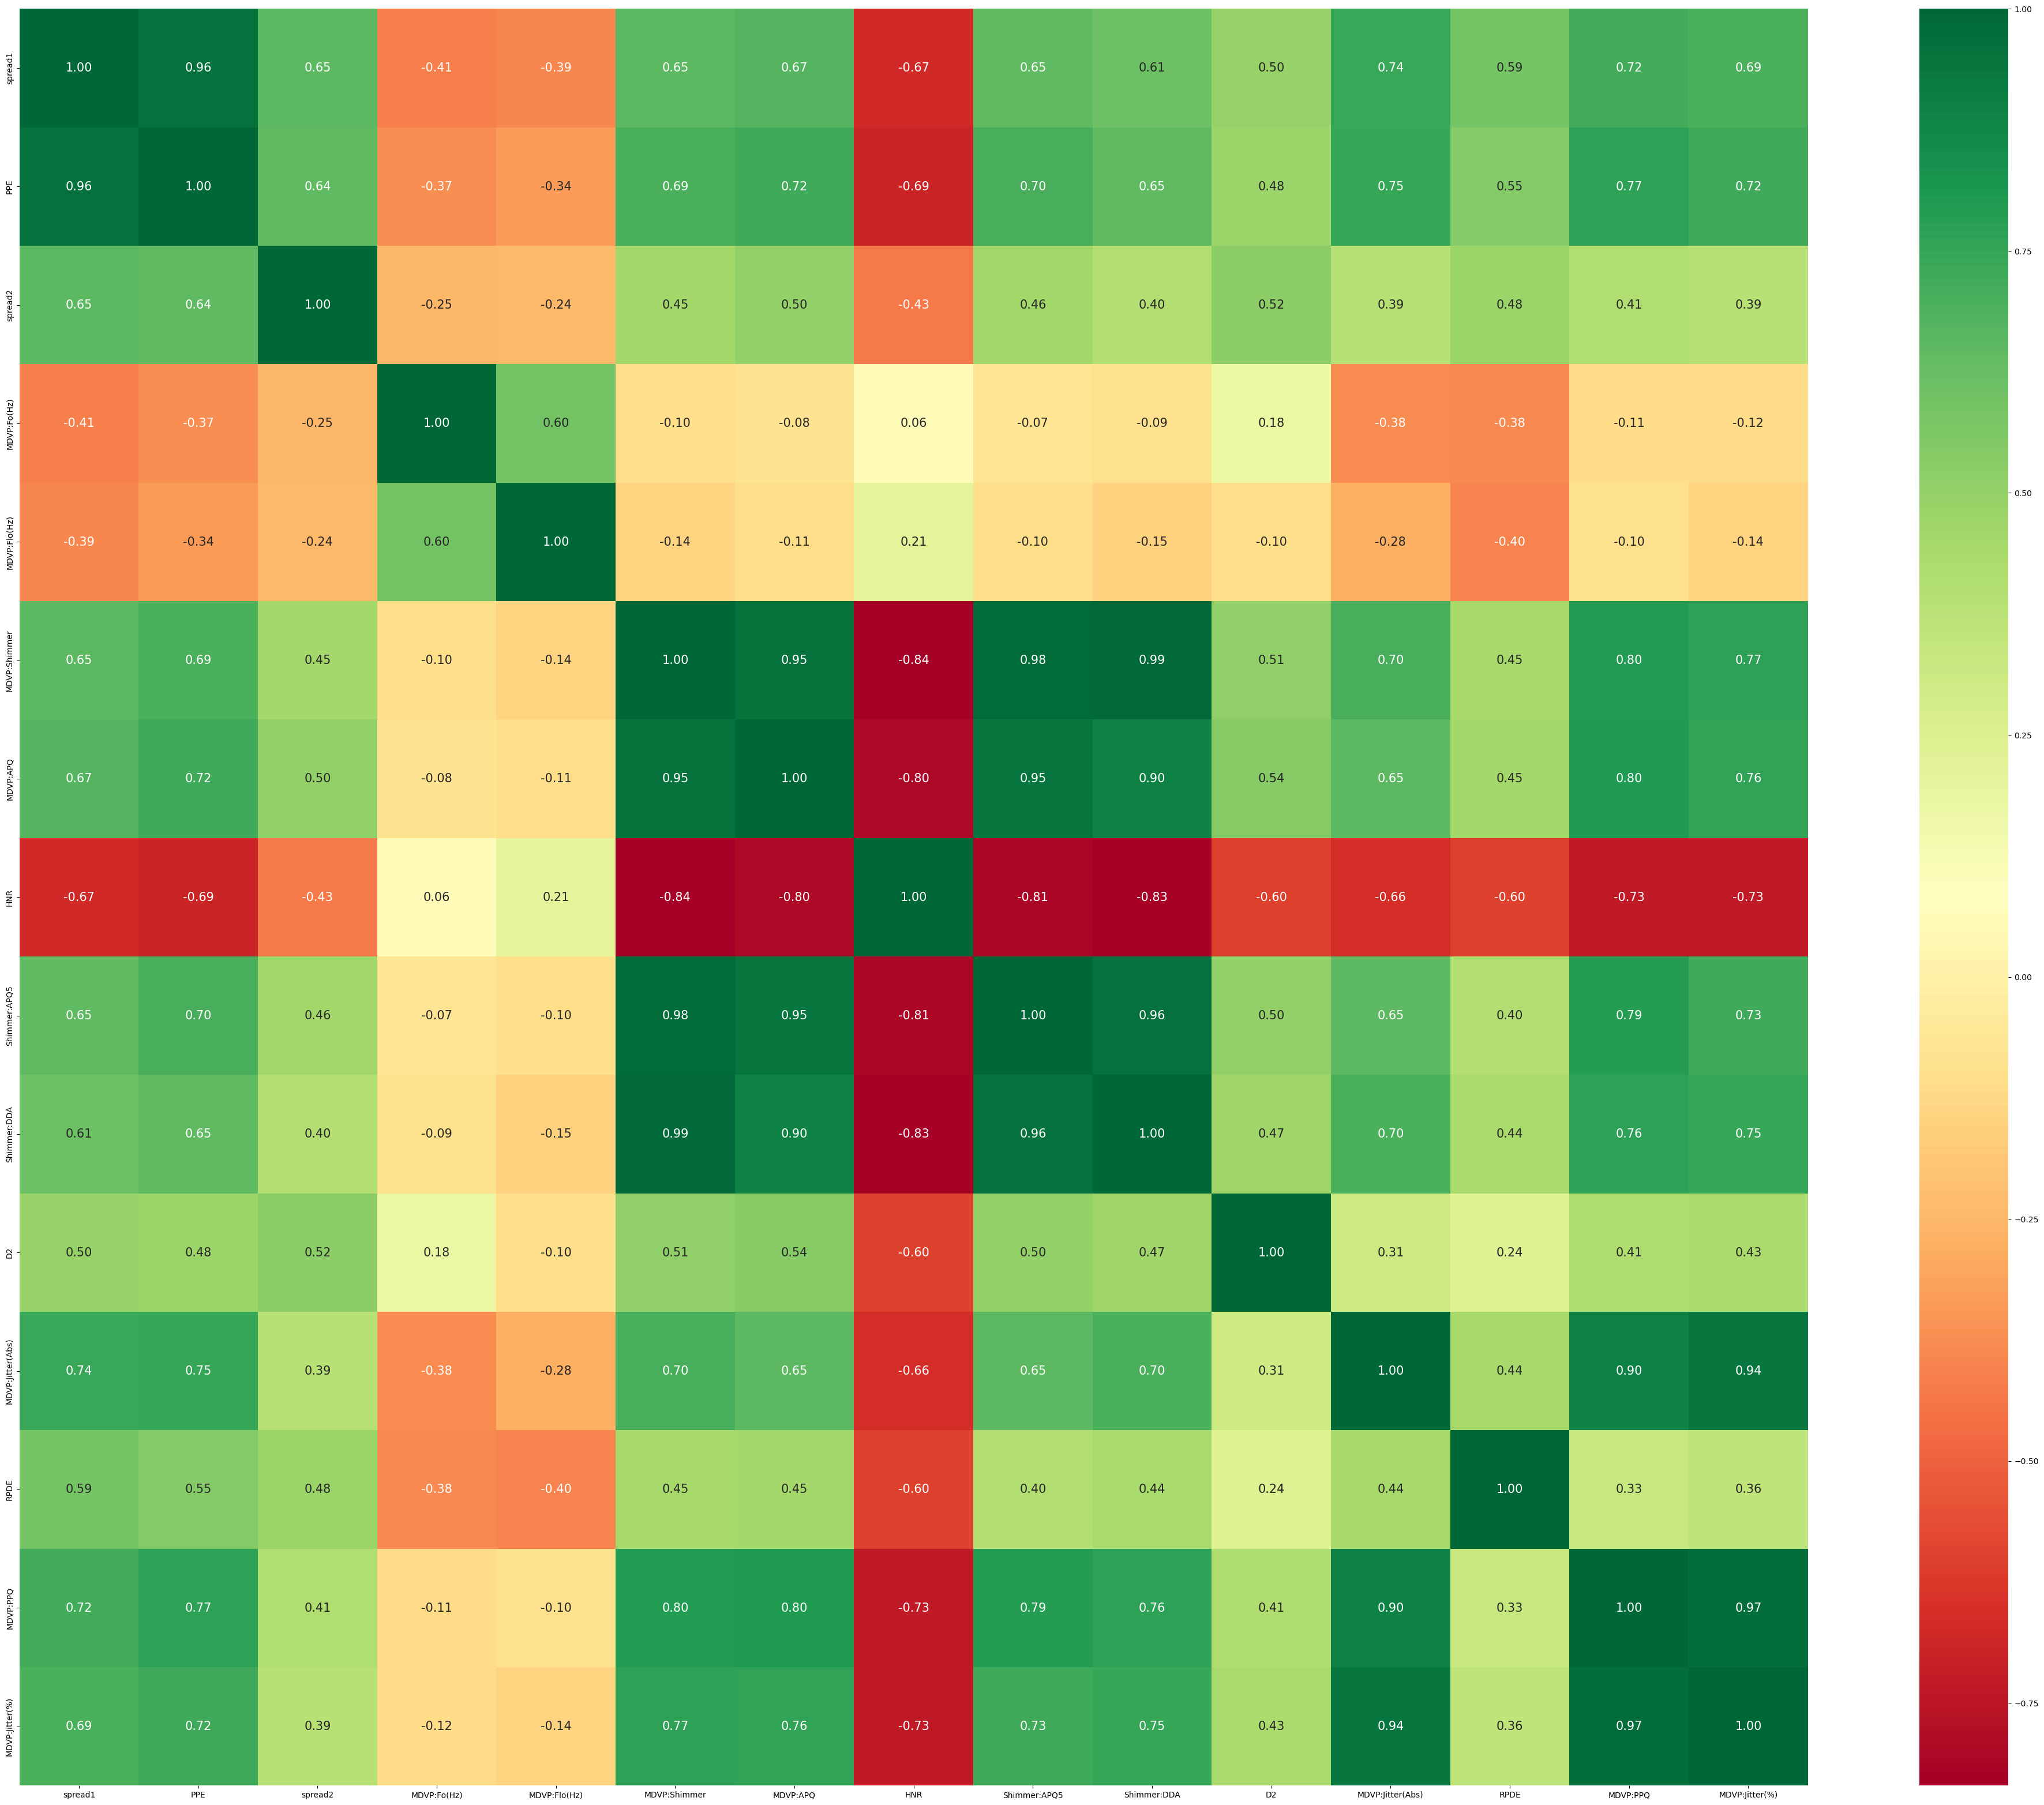

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# figure size
plt.figure(figsize=(50, 40))
# correlation matrix
dataplot = sns.heatmap(df_imp.corr(), annot_kws={"size": 15} , annot=True, fmt='.2f', cmap="RdYlGn")

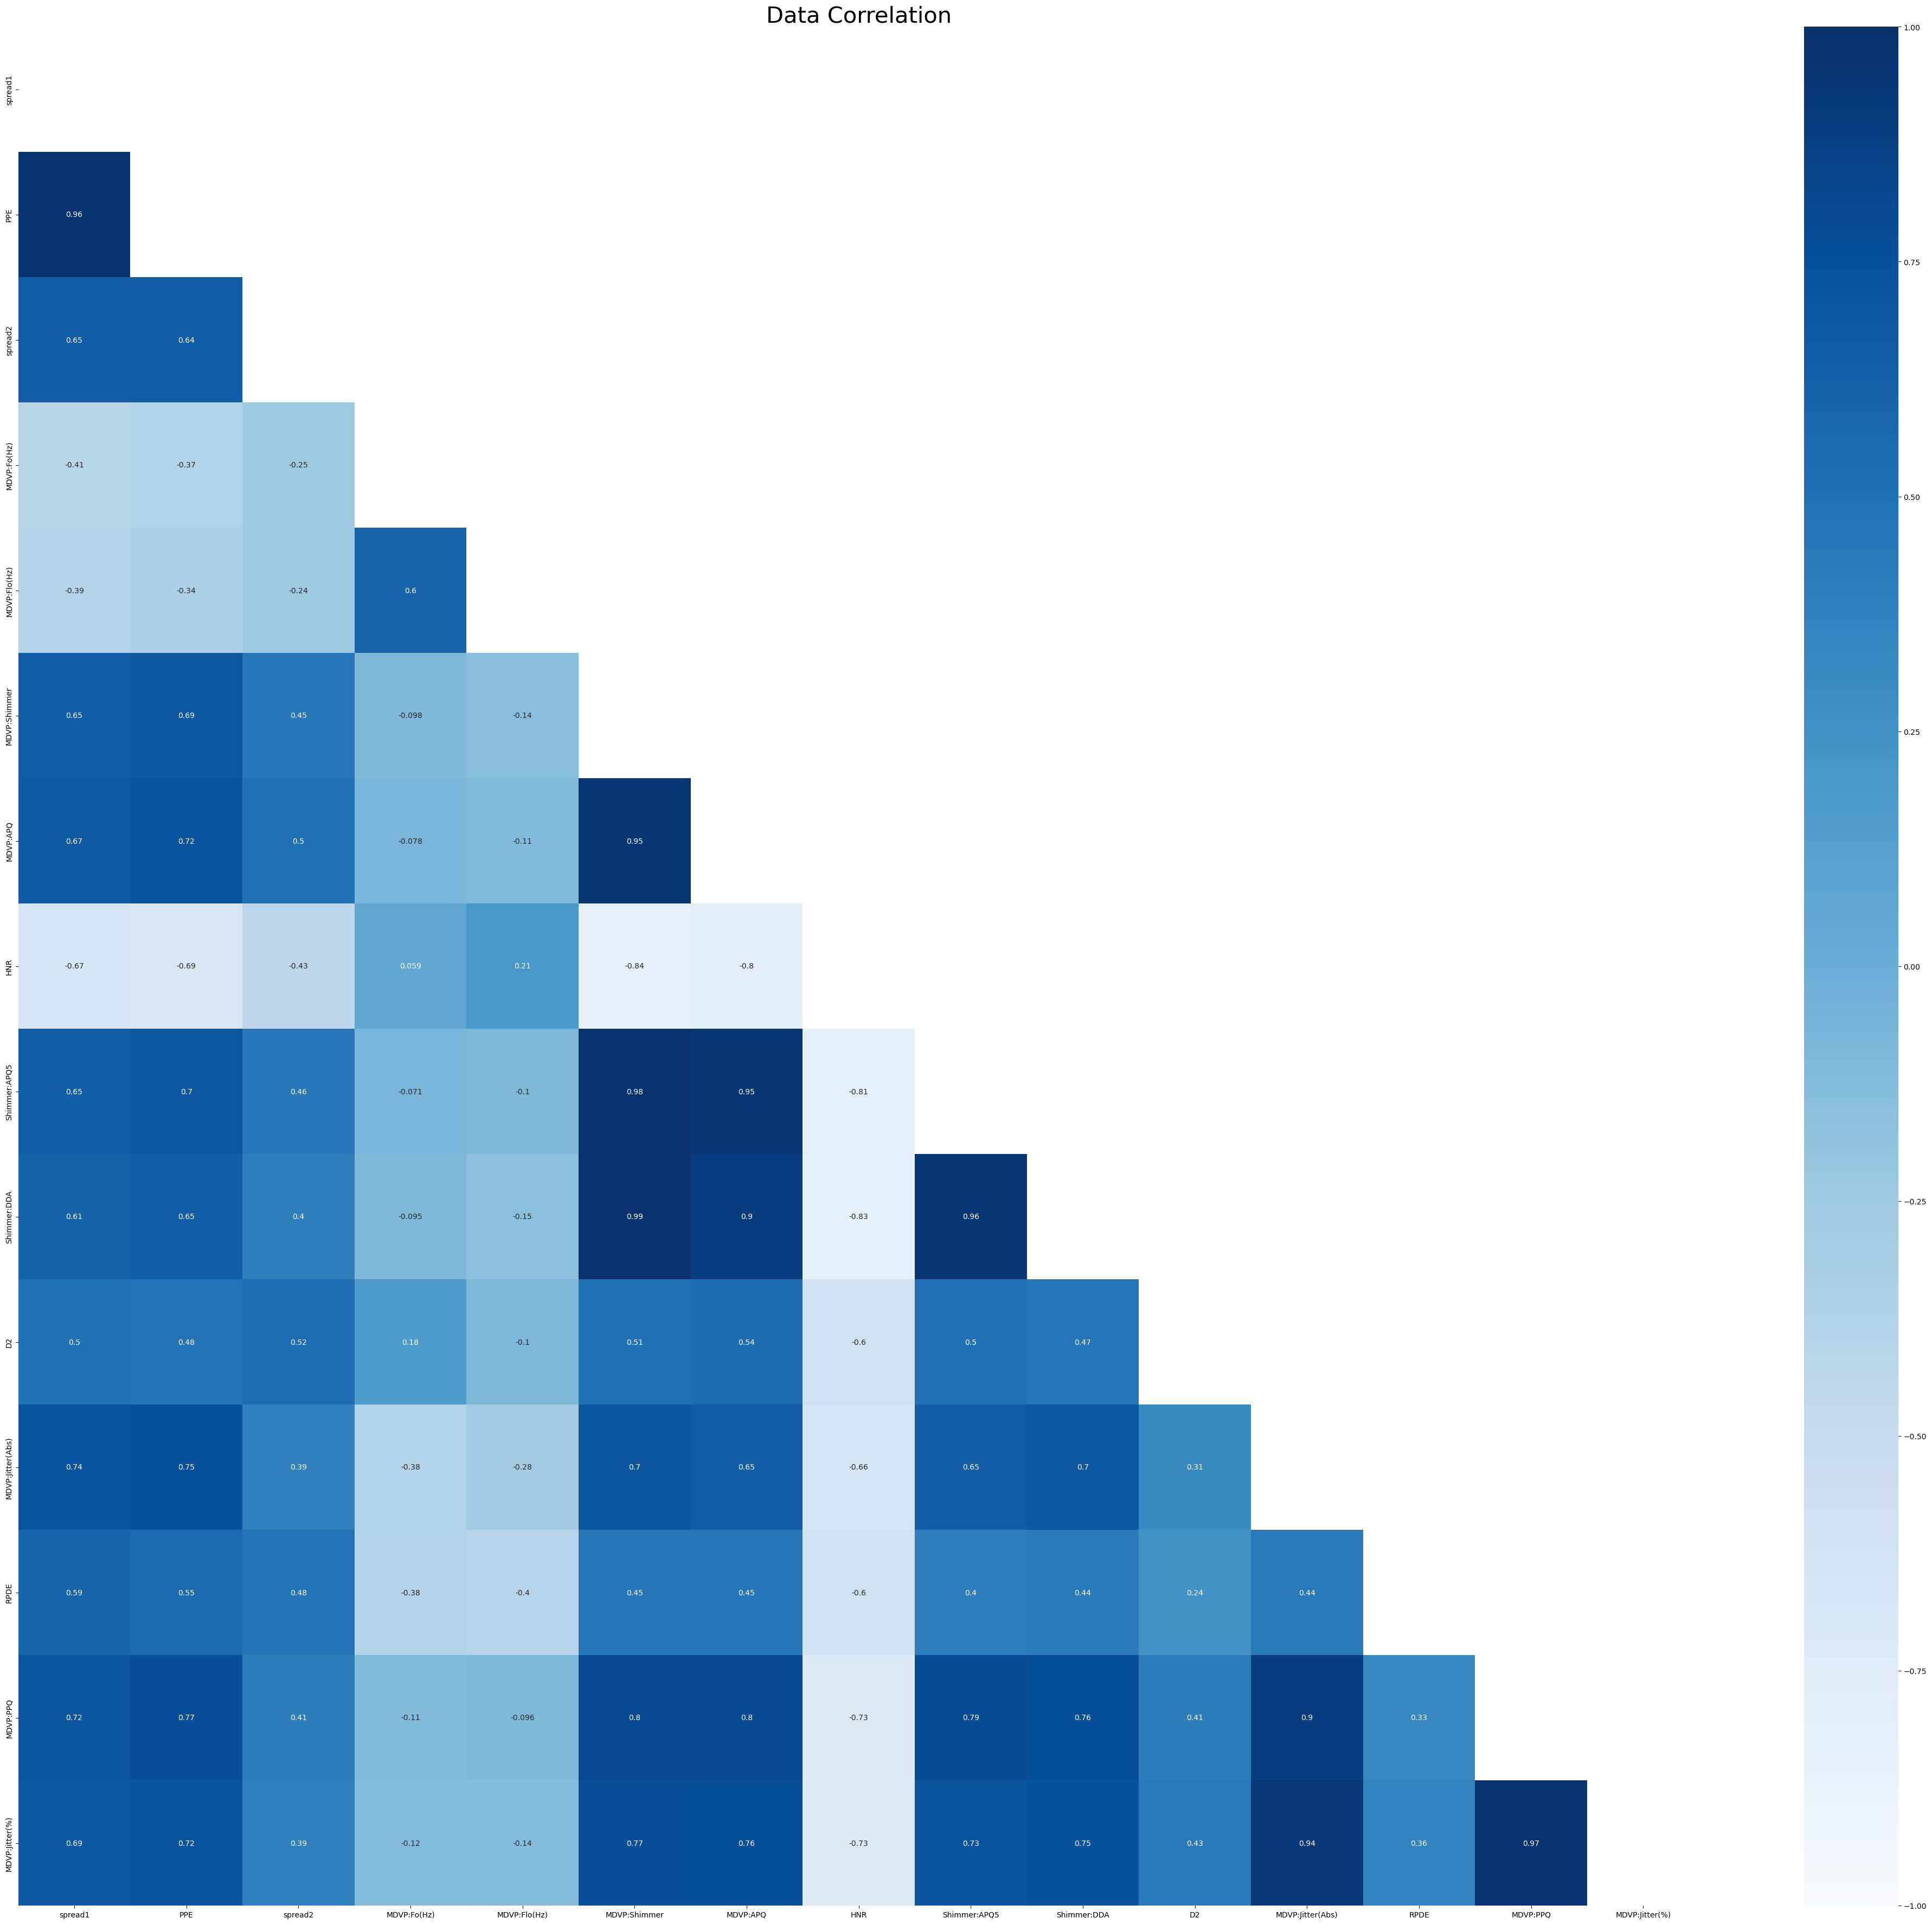

In [28]:
fig, ax = plt.subplots(figsize=(50, 45))
mask=np.triu(np.ones_like(df_imp.corr()))
sns.heatmap(df_imp.corr(), mask = mask, annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize = 30)
plt.show()

***this looks fine there aren't many multicollinearty , except NHR column***

## histogram of each feature

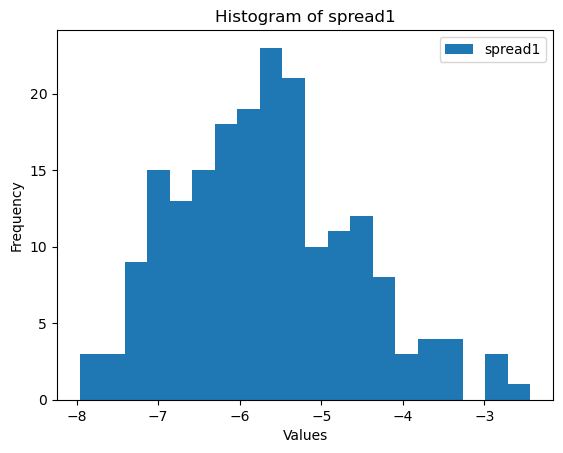

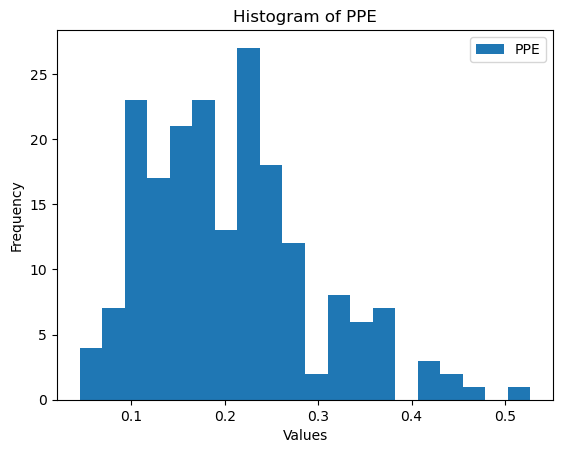

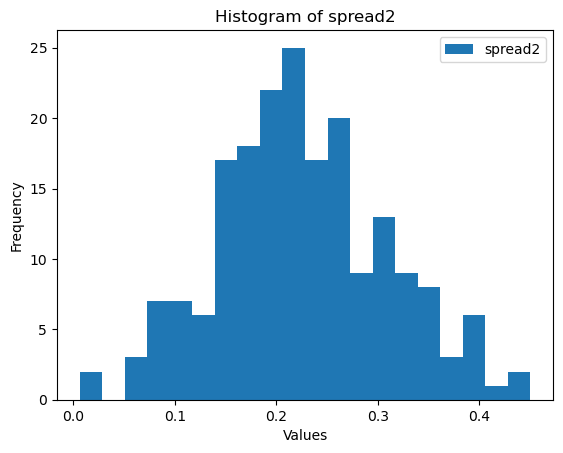

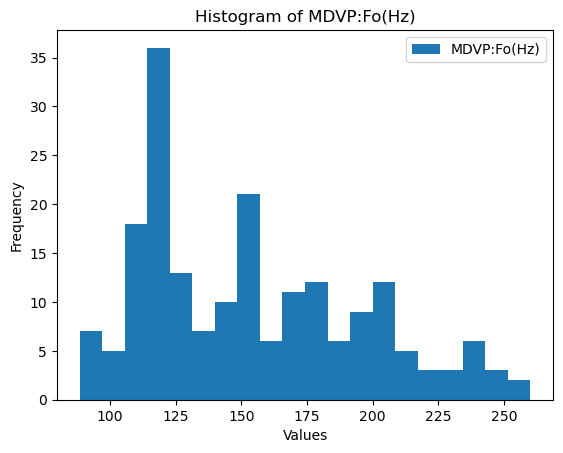

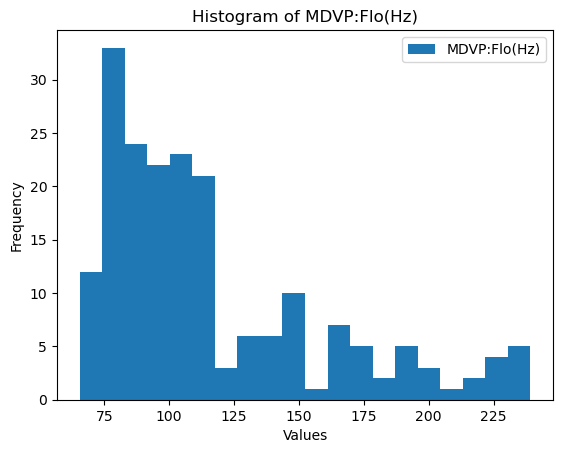

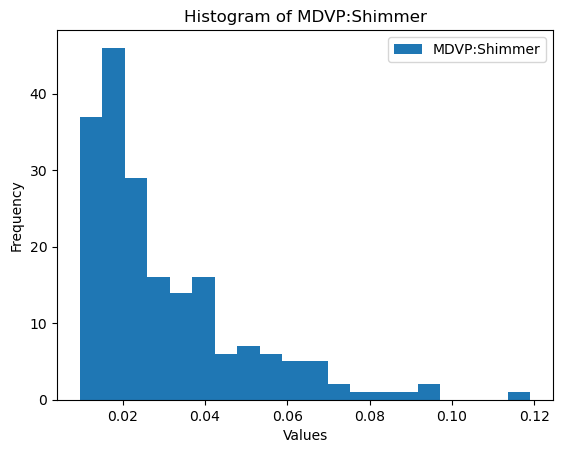

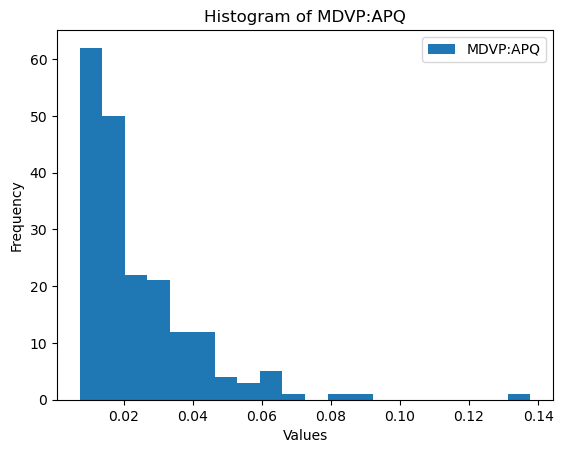

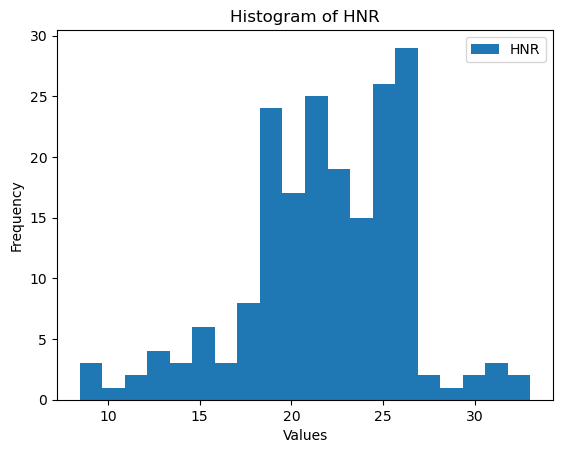

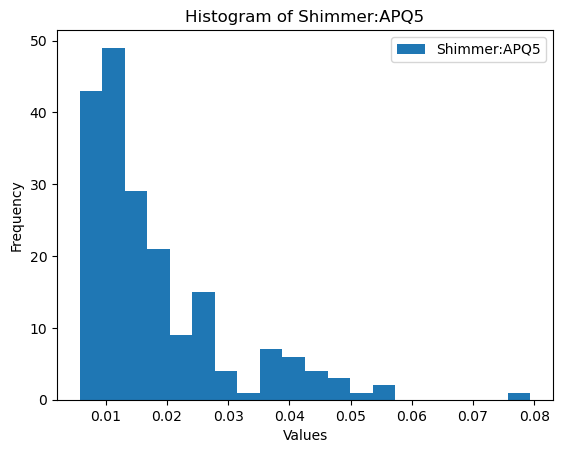

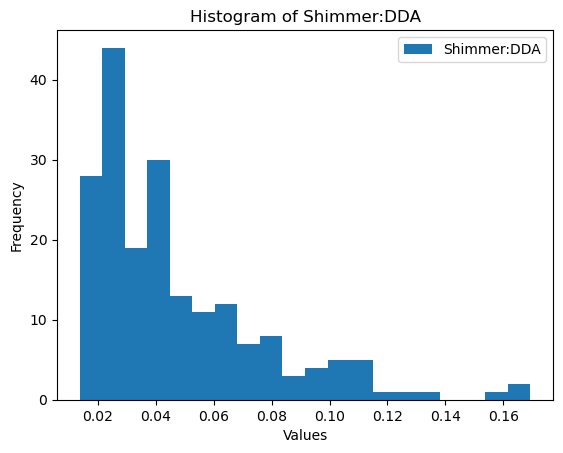

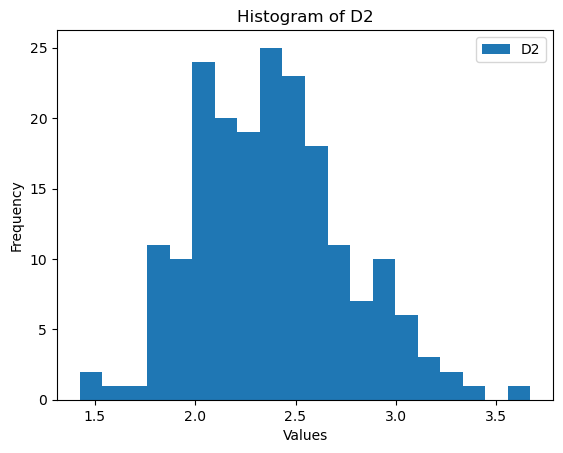

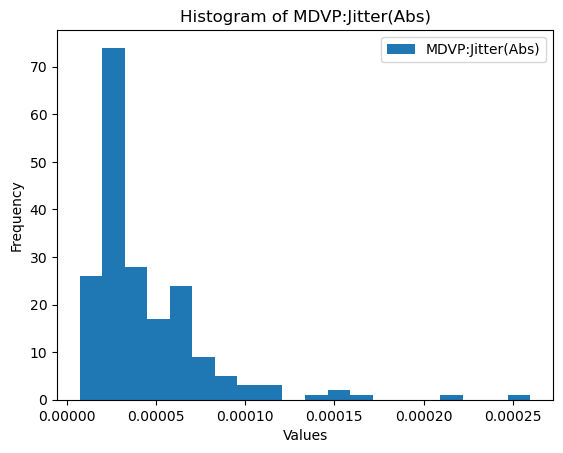

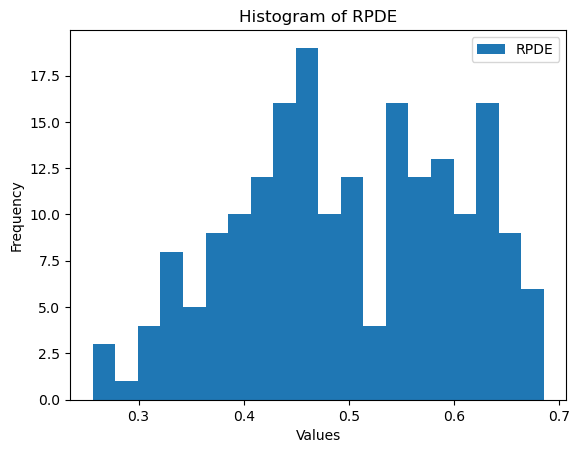

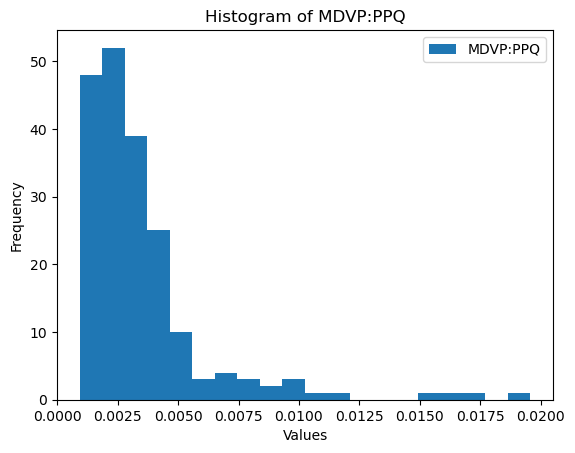

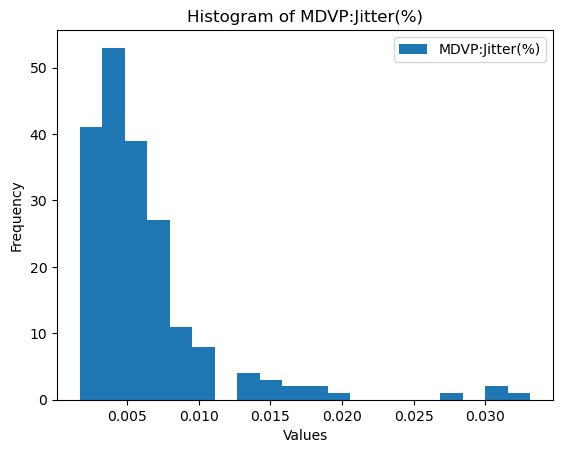

Statistical measures for spread1
Mean: -5.684396743589745
Median: -5.720868
Standard Deviation: 1.090207763740309
Variance: 1.1885529681196452
Skewness: 0.4321389320131794
Kurtosis: -0.05019918161280712

Statistical measures for PPE
Mean: 0.20655164102564103
Median: 0.194052
Standard Deviation: 0.0901193224822751
Variance: 0.008121492284664295
Skewness: 0.7974910716463577
Kurtosis: 0.5283349472852588

Statistical measures for spread2
Mean: 0.22651034871794873
Median: 0.218885
Standard Deviation: 0.08340576262039774
Variance: 0.006956521238290138
Skewness: 0.1444304854927841
Kurtosis: -0.08302289327680024

Statistical measures for MDVP:Fo(Hz)
Mean: 154.22864102564102
Median: 148.79
Standard Deviation: 41.39006474907147
Variance: 1713.1374599323287
Skewness: 0.5917374636540784
Kurtosis: -0.6278981066788805

Statistical measures for MDVP:Flo(Hz)
Mean: 116.32463076923077
Median: 104.315
Standard Deviation: 43.521413181993644
Variance: 1894.1134053578098
Skewness: 1.217350448627808
Kurtosis

In [29]:
import matplotlib.pyplot as plt

# Draw histogram of each feature
for col in df_imp.columns:
    plt.hist(df_imp[col], bins=20, label=col)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.legend()
    plt.show()
    
# Calculate statistical measures for each feature
for col in df_imp.columns:
    print('Statistical measures for {}'.format(col))
    print('Mean: {}'.format(df_imp[col].mean()))
    print('Median: {}'.format(df_imp[col].median()))
    print('Standard Deviation: {}'.format(df_imp[col].std()))
    print('Variance: {}'.format(df_imp[col].var()))
    print('Skewness: {}'.format(df_imp[col].skew()))
    print('Kurtosis: {}\n'.format(df_imp[col].kurtosis())) 


***Insights from histograms and which columns features need transformation and which transformation?***

    -From the histograms, it is evident that some of the columns have a skewed distribution. 
    -The columns that need transformation are spread1, PPE, spread2, MDVP:Fo(Hz), MDVP:Flo(Hz), MDVP:Shimmer, MDVP:APQ, HNR, Shimmer:APQ5, Shimmer:DDA, D2, RPDE. 
    -The transformation that can be used is log transformation to reduce the skewness of the data. 


    -The skewness and kurtosis values of the features can be used to determine which columns need transformation and which transformation to use. If the skewness value is greater than 1 or less than -1, then the data is skewed and a log transformation should be used. If the kurtosis value is greater than 3 or less than -3, then the data is highly peaked and a square root transformation should be used.


**these columns have inappropriate value of skewness and kurtosis**
    
    ['MDVP:Flo(Hz)',
     'MDVP:Shimmer',
     'MDVP:APQ',
     'Shimmer:APQ5',
     'Shimmer:DDA',
     'MDVP:Jitter(Abs)',
     'MDVP:PPQ',
     'MDVP:Jitter(%)']

In [30]:
# Calculate skewness and kurtosis for each column in the dataframe
skew_values = df_imp.skew()
kurt_values = df_imp.kurtosis()

# Create a list of columns to transform
transform_cols = []

# Iterate through each column and check if skewness or kurtosis is greater than 1 or -1 and 3 or -3 respectively
for col in df_imp.columns:
    if skew_values[col] > 1 or skew_values[col] < -1:
        transform_cols.append(col)
    elif kurt_values[col] > 3 or kurt_values[col] < -3:
        transform_cols.append(col)


### Transform the columns using log or square root transformation as appropriate 


In [31]:
        
for col in transform_cols:
    if skew_values[col] > 1 or skew_values[col] < -1:
        df_imp.loc[:, col] = np.log(df_imp[col])
    elif kurt_values[col] > 3 or kurt_values[col] < -3:
        df_imp.loc[: , col] = np.sqrt(df_imp[col])


In [32]:
df_imp

,spread1,PPE,spread2,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:APQ,HNR,Shimmer:APQ5,Shimmer:DDA,D2,MDVP:Jitter(Abs),RPDE,MDVP:PPQ,MDVP:Jitter(%)
0,-4.813031,0.284654,0.266482,119.992,4.317448,-3.129492,-3.516272,21.033,-3.464137,-2.726469,2.301442,-9.567015,0.414783,-5.195761,-4.848516
1,-4.075192,0.368674,0.335590,122.400,4.734609,-2.791323,-3.130865,19.085,-3.097101,-2.364141,2.486855,-9.433484,0.458359,-4.967576,-4.637693
2,-4.443179,0.332634,0.311173,116.682,4.714518,-2.950185,-3.327018,20.651,-3.255021,-2.492536,2.342259,-9.315701,0.429895,-4.852350,-4.556380
3,-4.117501,0.368975,0.334147,116.676,4.712822,-2.901878,-3.277565,20.644,-3.217627,-2.433719,2.405554,-9.315701,0.434969,-4.964706,-4.608175
4,-3.747787,0.410335,0.234513,116.014,4.706417,-2.744974,-3.108901,19.649,-3.031359,-2.256656,2.332180,-9.115030,0.417356,-4.701681,-4.355190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-6.538586,0.133050,0.121952,174.188,4.546068,-3.197359,-3.595389,19.517,-3.689680,-2.658118,2.657476,-10.414313,0.448439,-5.956097,-5.383875
191,-6.195325,0.168895,0.129303,209.516,4.494105,-3.593206,-3.974430,19.147,-4.100161,-3.034057,2.784312,-10.414313,0.431674,-5.836172,-5.177871
192,-6.787197,0.131728,0.158453,174.688,4.307936,-3.768789,-4.094145,17.883,-4.294016,-3.269117,2.679772,-9.433484,0.407567,-5.177871,-4.297685
193,-6.744577,0.123306,0.207454,198.764,4.316207,-3.774002,-4.142695,19.020,-4.326781,-3.271749,2.138608,-10.126631,0.451221,-5.546779,-4.906275


# Standardisation


In [33]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the scaler to the dataframe
scaled_df = scaler.fit_transform(df_imp)
scaled_df= pd.DataFrame(scaled_df)
scaled_df.columns = df_imp.columns
scaled_df

,spread1,PPE,spread2,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:APQ,HNR,Shimmer:APQ5,Shimmer:DDA,D2,MDVP:Jitter(Abs),RPDE,MDVP:PPQ,MDVP:Jitter(%)
0,0.801323,0.868886,0.480477,-0.829300,-1.130130,0.990596,0.683464,-0.193225,1.285036,0.871301,-0.210531,1.004516,-0.807838,1.153152,0.732299
1,1.479853,1.803605,1.311185,-0.770972,0.113935,1.598381,1.365182,-0.634508,1.924188,1.492447,0.275077,1.192807,-0.387524,1.545265,1.100129
2,1.141445,1.402661,1.017682,-0.909476,0.054017,1.312861,1.018221,-0.279760,1.649187,1.272337,-0.103629,1.358893,-0.662075,1.743269,1.241999
3,1.440945,1.806954,1.293840,-0.909622,0.048960,1.399684,1.105695,-0.281346,1.714306,1.373167,0.062145,1.358893,-0.613134,1.550196,1.151631
4,1.780940,2.267082,0.096195,-0.925657,0.029859,1.681685,1.404032,-0.506745,2.038669,1.676711,-0.130026,1.641857,-0.783021,2.002179,1.593023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-0.785527,-0.817703,-1.256837,0.483467,-0.448338,0.868621,0.543518,-0.536647,0.892279,0.988476,0.721944,-0.190254,-0.483208,-0.153410,-0.201761
191,-0.469859,-0.418929,-1.168475,1.339202,-0.603303,0.157173,-0.126941,-0.620463,0.177472,0.343995,1.054135,-0.190254,-0.644916,0.052670,0.157662
192,-1.014154,-0.832410,-0.818079,0.495578,-1.158497,-0.158399,-0.338694,-0.906799,-0.160103,-0.058973,0.780338,1.192807,-0.877441,1.183894,1.693353
193,-0.974960,-0.926105,-0.229066,1.078761,-1.133830,-0.167768,-0.424571,-0.649233,-0.217160,-0.063486,-0.637003,0.215405,-0.456374,0.549963,0.631525


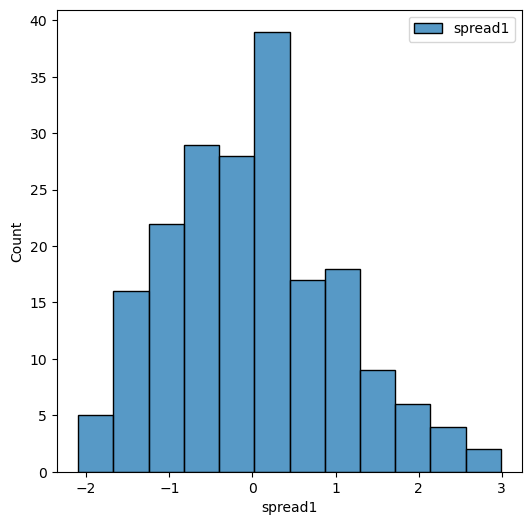

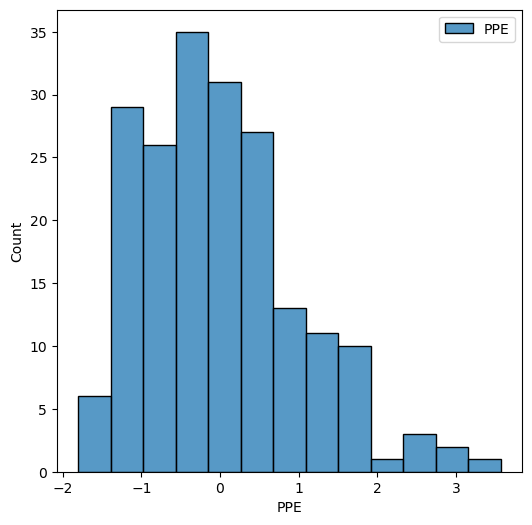

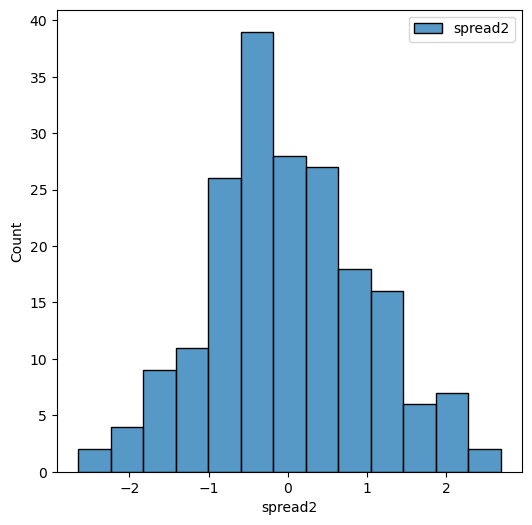

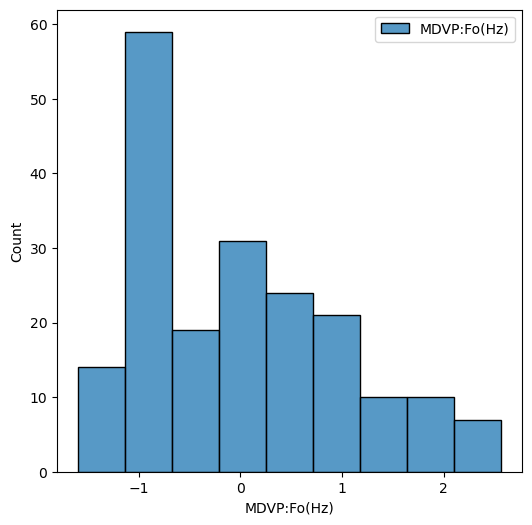

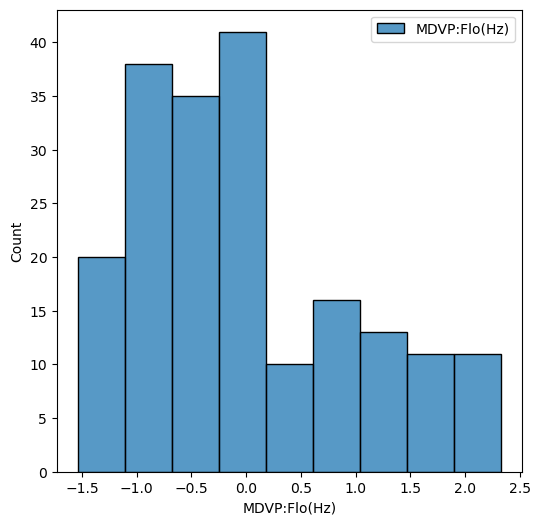

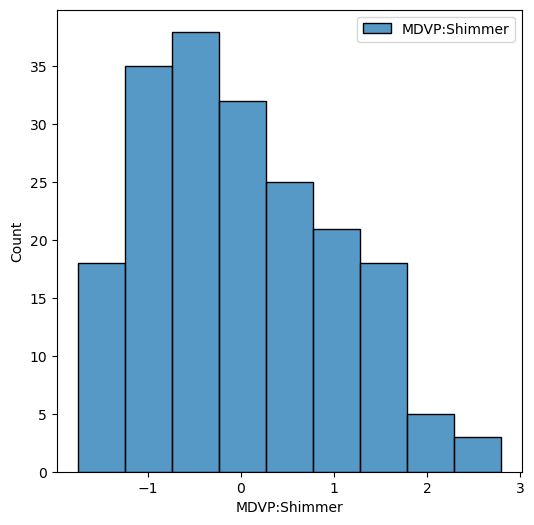

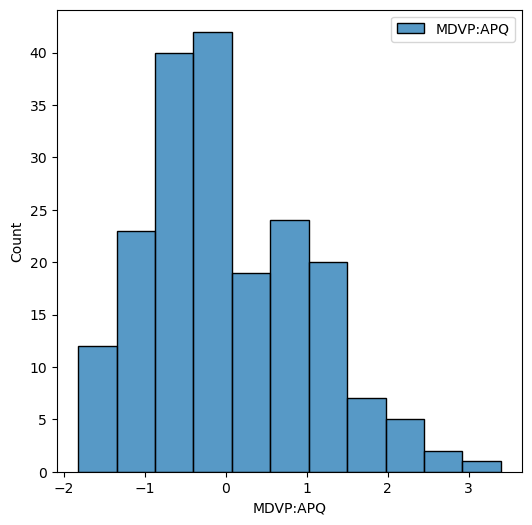

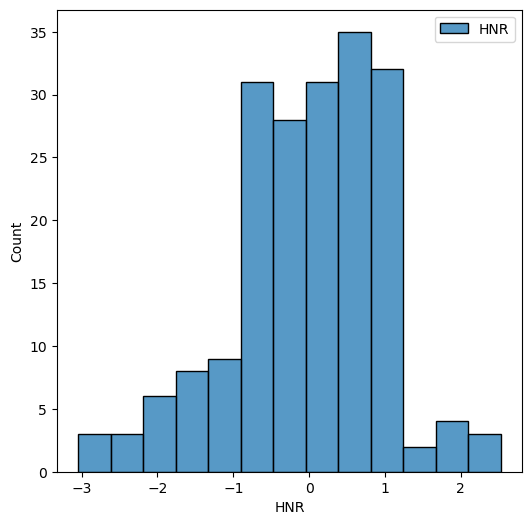

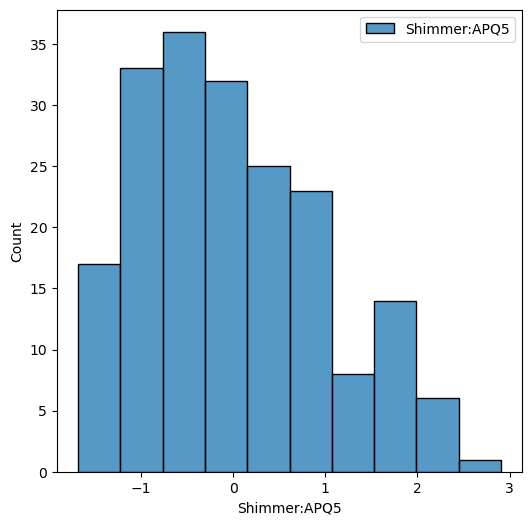

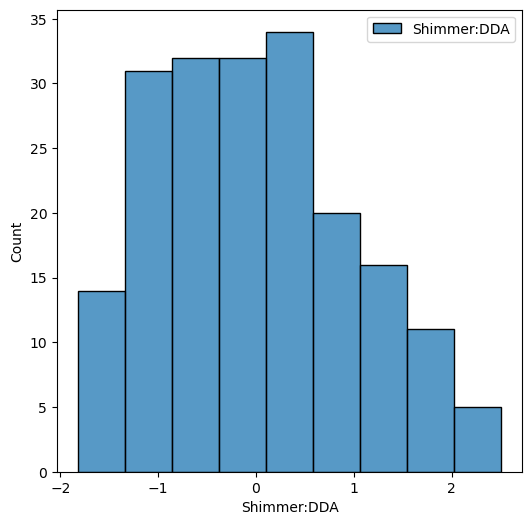

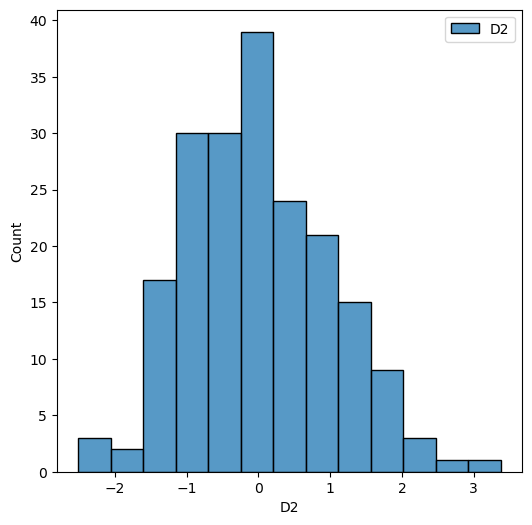

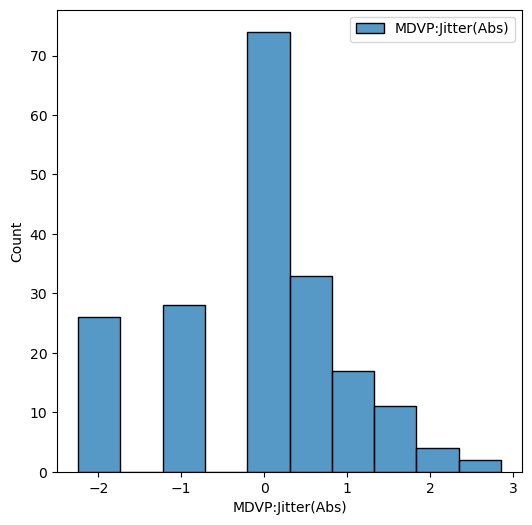

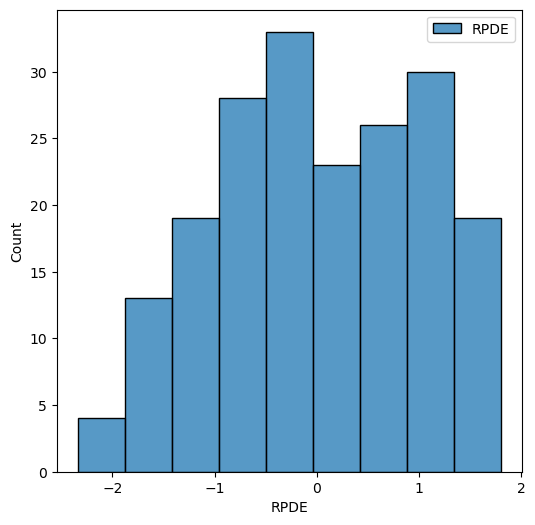

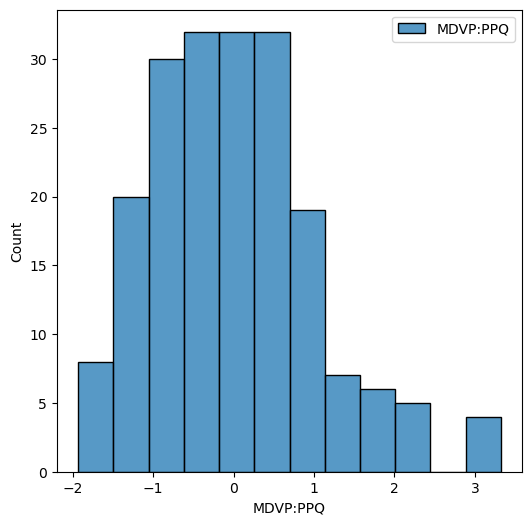

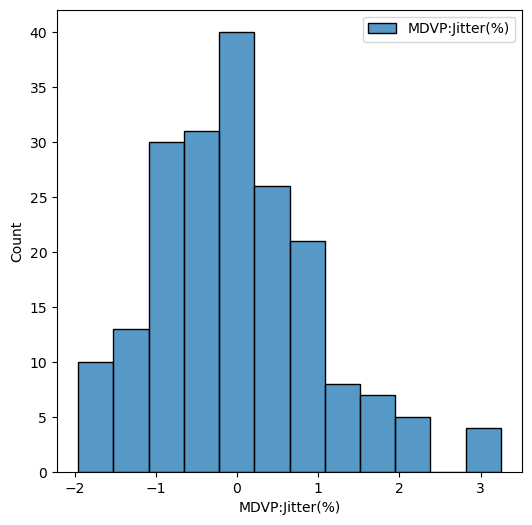

In [34]:
# set figure size
plt.rcParams['figure.figsize'] = (6, 6)

# draw histogram of each feature
for col in scaled_df.columns:
    sns.histplot(scaled_df[col], kde=False, label=col)
    plt.legend()
    plt.show()
    

**now its looks better all our columns are normally distributed**

In [35]:
scaled_df.isnull().sum()

spread1             0
PPE                 0
spread2             0
MDVP:Fo(Hz)         0
MDVP:Flo(Hz)        0
MDVP:Shimmer        0
MDVP:APQ            0
HNR                 0
Shimmer:APQ5        0
Shimmer:DDA         0
D2                  0
MDVP:Jitter(Abs)    0
RPDE                0
MDVP:PPQ            0
MDVP:Jitter(%)      0
dtype: int64

In [36]:
df_imp

,spread1,PPE,spread2,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:APQ,HNR,Shimmer:APQ5,Shimmer:DDA,D2,MDVP:Jitter(Abs),RPDE,MDVP:PPQ,MDVP:Jitter(%)
0,-4.813031,0.284654,0.266482,119.992,4.317448,-3.129492,-3.516272,21.033,-3.464137,-2.726469,2.301442,-9.567015,0.414783,-5.195761,-4.848516
1,-4.075192,0.368674,0.335590,122.400,4.734609,-2.791323,-3.130865,19.085,-3.097101,-2.364141,2.486855,-9.433484,0.458359,-4.967576,-4.637693
2,-4.443179,0.332634,0.311173,116.682,4.714518,-2.950185,-3.327018,20.651,-3.255021,-2.492536,2.342259,-9.315701,0.429895,-4.852350,-4.556380
3,-4.117501,0.368975,0.334147,116.676,4.712822,-2.901878,-3.277565,20.644,-3.217627,-2.433719,2.405554,-9.315701,0.434969,-4.964706,-4.608175
4,-3.747787,0.410335,0.234513,116.014,4.706417,-2.744974,-3.108901,19.649,-3.031359,-2.256656,2.332180,-9.115030,0.417356,-4.701681,-4.355190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-6.538586,0.133050,0.121952,174.188,4.546068,-3.197359,-3.595389,19.517,-3.689680,-2.658118,2.657476,-10.414313,0.448439,-5.956097,-5.383875
191,-6.195325,0.168895,0.129303,209.516,4.494105,-3.593206,-3.974430,19.147,-4.100161,-3.034057,2.784312,-10.414313,0.431674,-5.836172,-5.177871
192,-6.787197,0.131728,0.158453,174.688,4.307936,-3.768789,-4.094145,17.883,-4.294016,-3.269117,2.679772,-9.433484,0.407567,-5.177871,-4.297685
193,-6.744577,0.123306,0.207454,198.764,4.316207,-3.774002,-4.142695,19.020,-4.326781,-3.271749,2.138608,-10.126631,0.451221,-5.546779,-4.906275


In [37]:
df1.head(1)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654


In [38]:
scaled_df.head(1)

,spread1,PPE,spread2,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:APQ,HNR,Shimmer:APQ5,Shimmer:DDA,D2,MDVP:Jitter(Abs),RPDE,MDVP:PPQ,MDVP:Jitter(%)
0,0.801323,0.868886,0.480477,-0.8293,-1.13013,0.990596,0.683464,-0.193225,1.285036,0.871301,-0.210531,1.004516,-0.807838,1.153152,0.732299


In [39]:
df_imp.head(1)

,spread1,PPE,spread2,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Shimmer,MDVP:APQ,HNR,Shimmer:APQ5,Shimmer:DDA,D2,MDVP:Jitter(Abs),RPDE,MDVP:PPQ,MDVP:Jitter(%)
0,-4.813031,0.284654,0.266482,119.992,4.317448,-3.129492,-3.516272,21.033,-3.464137,-2.726469,2.301442,-9.567015,0.414783,-5.195761,-4.848516


# SAMMPLING

<Axes: xlabel='status', ylabel='count'>

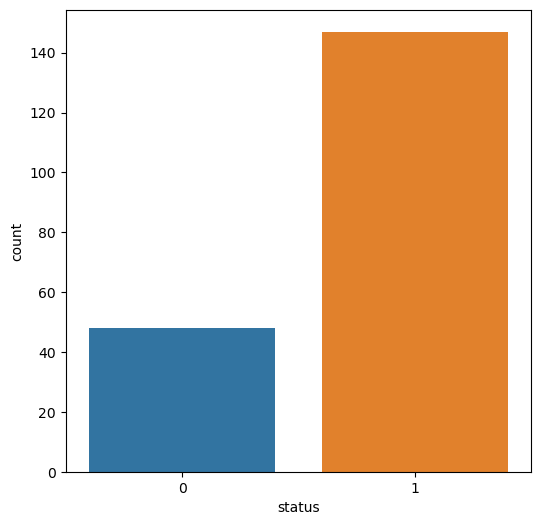

In [40]:
sns.countplot(x = df["status"])

    we can clearly see that one of the category that is not affected with parkinson is less as compared to another 

In [41]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [108]:
# import SMOTE library
from imblearn.over_sampling import SMOTE

# separate input features and target
y1 = df.status
X1 = df.drop(columns=["name","status"])
y2 = df.status
X2 = df_imp
y3 = df.status
X3 = scaled_df

# apply SMOTE (res = resampling)
sm = SMOTE(random_state=42)
X_res1, y_res1 = sm.fit_resample(X1, y1)
X_res2, y_res2 = sm.fit_resample(X2, y2)
X_res3, y_res3 = sm.fit_resample(X3, y3)


In [43]:
# let's visualize how will out new data looks like , here we are taking X_res3, y_res3
# Merge x_res and y_res
df_merged = pd.merge(X_res3, y_res3, left_index=True, right_index=True)


<Axes: xlabel='status', ylabel='count'>

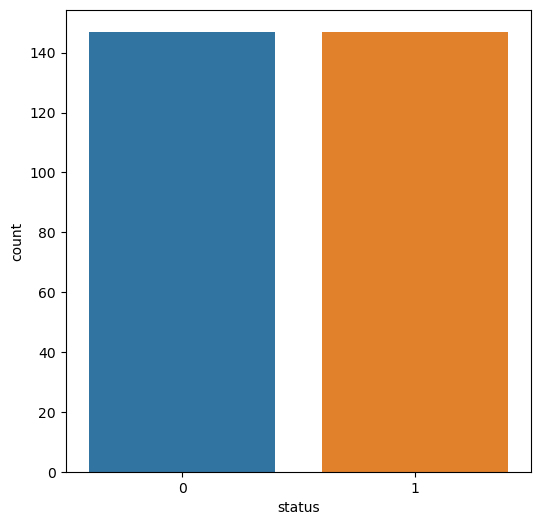

In [44]:
sns.countplot(data = df_merged , x = "status")

In [45]:
df_merged["status"].value_counts()

status
1    147
0    147
Name: count, dtype: int64

**Now are data is free of imbalance problem**

In [109]:
X = X_res1
X_scaled=X_res2
X_imp = X_res3
y = y_res1

i can now use these different versions of  data to train and evaluate machine learning models to see which preprocessing method works best. This allows me to compare the performance of models with different preprocessing techniques and choose the one that gives me the best results.


# MODEL BUILDING

Till now we have three data , 

    1. original data without preprocessing(X)
    2. data important columns (X_imp)
    3. data with important columns and complete preprocessing(X_sclaled)

In [110]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_sclaed, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42) # another splittiing 
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_imp, y, test_size=0.3, random_state=42) # another splittiing 


### RandomForestClassifier`

In [111]:
from sklearn.ensemble import RandomForestClassifier
ran_clf = RandomForestClassifier(n_estimators=500, 
bootstrap=True , oob_score=True,  n_jobs=-1,random_state=42)
ran_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
ran_clf_scaled = RandomForestClassifier(n_estimators=500, 
bootstrap=True , oob_score=True,  n_jobs=-1,random_state=42)
ran_clf_scaled.fit(X_train_sclaed, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=42)

In [50]:
ran_clf_imp_cols = RandomForestClassifier(n_estimators=500, 
bootstrap=True , oob_score=True,n_jobs=-1 ,random_state=42)
ran_clf_imp_cols.fit(X_train_imp, y_train) # for selected cols

RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=42)

## prediction on test set

In [51]:
y_pred_rf = ran_clf.predict(X_test)
y_pred_rf_scaled = ran_clf_scaled.predict(X_test_scaled)
y_pred_rf_imp_Cols = ran_clf_imp_cols.predict(X_test_imp)


In [52]:
from sklearn.metrics import accuracy_score
print("accuracy score for original Random Forest :",accuracy_score(y_pred_rf , y_test))
print("accuracy score for scaled Random Forest:",accuracy_score(y_pred_rf_scaled, y_test))
print("accuracy score for important Random Forest:",accuracy_score(y_pred_rf_imp_Cols , y_test))


accuracy score for original Random Forest : 0.9438202247191011
accuracy score for scaled Random Forest: 0.9438202247191011
accuracy score for important Random Forest: 0.9550561797752809


### cross_val_score 

In [53]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ran_clf , X_train , y_train, cv=3, scoring='accuracy')
scores_for_imp_cols = cross_val_score(ran_clf_imp_cols , X_train_imp , y_train, cv=3, scoring='accuracy')
scores_for_scaled_cols = cross_val_score(ran_clf_scaled , X_train_sclaed , y_train, cv=3, scoring='accuracy')
print("Cross_val_score score for original Random Forest :",scores.mean().round(2))
print("Cross_val_score score for important_cols Random Forest :",scores_for_imp_cols.mean().round(3))
print("Cross_val_score score for scaled Random Forest :",scores_for_scaled_cols.mean().round(2))

Cross_val_score score for original Random Forest : 0.91
Cross_val_score score for important_cols Random Forest : 0.927
Cross_val_score score for scaled Random Forest : 0.93


## important features

In [54]:
feature_importance_data = pd.DataFrame({'Feature': X.columns, 'Importance': ran_clf.feature_importances_})
sorted_feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)
sorted_feature_importance_data

,Feature,Importance
21,PPE,0.096888
18,spread1,0.094448
12,MDVP:APQ,0.075294
19,spread2,0.065992
0,MDVP:Fo(Hz),0.062492
1,MDVP:Fhi(Hz),0.061380
11,Shimmer:APQ5,0.059334
8,MDVP:Shimmer,0.056474
2,MDVP:Flo(Hz),0.048747
13,Shimmer:DDA,0.048262


In [55]:
feature_importance_data_imp = pd.DataFrame({'Feature': X_imp.columns, 'Importance': ran_clf_imp_cols.feature_importances_})
sorted_feature_importance_data_imp = feature_importance_data_imp.sort_values(by='Importance', ascending=False)
sorted_feature_importance_data_imp

,Feature,Importance
6,MDVP:APQ,0.114733
0,spread1,0.114286
1,PPE,0.092246
3,MDVP:Fo(Hz),0.089169
8,Shimmer:APQ5,0.087282
2,spread2,0.077456
5,MDVP:Shimmer,0.068068
4,MDVP:Flo(Hz),0.066408
10,D2,0.064868
9,Shimmer:DDA,0.061225


In [56]:
feature_importance_data_scaled = pd.DataFrame({'Feature': X_scaled.columns, 'Importance': ran_clf_scaled.feature_importances_})
sorted_feature_importance_data_scaled = feature_importance_data_scaled.sort_values(by='Importance', ascending=False)
sorted_feature_importance_data_scaled

,Feature,Importance
6,MDVP:APQ,0.119910
0,spread1,0.102852
3,MDVP:Fo(Hz),0.092591
1,PPE,0.092312
8,Shimmer:APQ5,0.089850
2,spread2,0.077039
10,D2,0.072447
5,MDVP:Shimmer,0.071424
9,Shimmer:DDA,0.066827
4,MDVP:Flo(Hz),0.052965


### OOB SCORE

In [57]:
ran_clf.oob_score_ 

0.926829268292683

In [58]:
ran_clf_imp_cols.oob_score_

0.9414634146341463

In [59]:
ran_clf_scaled.oob_score_

0.9365853658536586

### Classification Report

In [60]:
from sklearn.metrics import classification_report
print("original Random Forest Classification Report:", "\n", classification_report(y_pred_rf , y_test ,target_names= ["Healthy","PD"] ))

print("""

""")
from sklearn.metrics import classification_report
print("important cols Random Forest Classification Report:", "\n", classification_report(y_pred_rf_imp_Cols , y_test ,target_names= ["Healthy","PD"] ))

print("""

""")
from sklearn.metrics import classification_report
print("scaled Random Forest Classification Report:", "\n", classification_report(y_pred_rf_scaled , y_test ,target_names= ["Healthy","PD"] ))

original Random Forest Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.97      0.90      0.94        42
          PD       0.92      0.98      0.95        47

    accuracy                           0.94        89
   macro avg       0.95      0.94      0.94        89
weighted avg       0.95      0.94      0.94        89




important cols Random Forest Classification Report: 
               precision    recall  f1-score   support

     Healthy       1.00      0.91      0.95        43
          PD       0.92      1.00      0.96        46

    accuracy                           0.96        89
   macro avg       0.96      0.95      0.95        89
weighted avg       0.96      0.96      0.95        89




scaled Random Forest Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.97      0.90      0.94        42
          PD       0.92      0.98      0.95        47

    accuracy                

### ROC SCORES

In [61]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(ran_clf, X_train, y_train, cv=3 , method="predict_proba") # for orginal Random forest
y_scores_1 = cross_val_predict(ran_clf_imp_cols, X_train_imp, y_train, cv=3 , method="predict_proba") # Scores for new random forest : " )
y_scores_2 = cross_val_predict(ran_clf_scaled, X_train_sclaed, y_train, cv=3 , method="predict_proba") # Scores for new random forest : " )


In [62]:
y_scores[5]

array([0.34, 0.66])

In [63]:
y_scores_1[5]

array([0.224, 0.776])

In [64]:
y_scores_2[5]

array([0.238, 0.762])

**above we can see that all of our three models made prediction with differnt confidence level**

In [65]:
y_scores_forest = y_scores[:, 1] # we have taken only positive class's probability
y_scores_forest_new = y_scores_1[:, 1] # we have taken only positive class's probability
y_scores_forest_scaled = y_scores_2[:, 1] # we have taken only positive class's probability


# ROC Curve and AUC

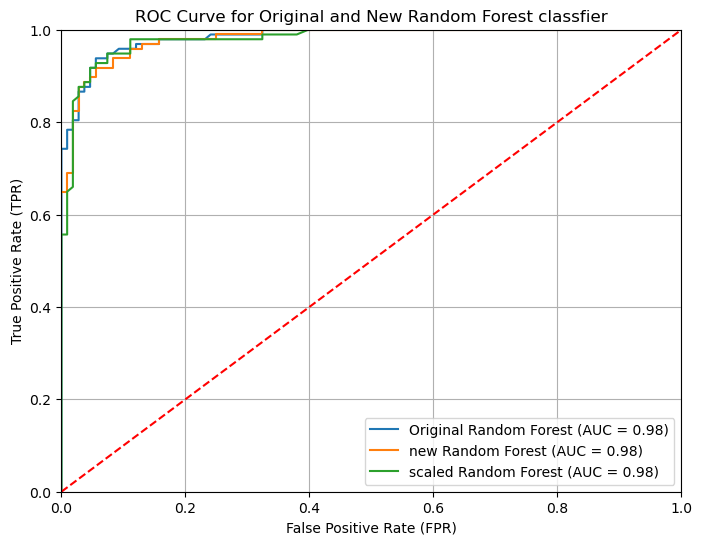

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have y_true and y_scores for both Classifier A and Classifier B
y_true_a, y_scores_a = y_train, y_scores_forest
y_true_b, y_scores_b = y_train, y_scores_forest_new
y_true_c, y_scores_c = y_train, y_scores_forest_scaled

# Calculate ROC curves for both classifiers
fpr_a, tpr_a, _ = roc_curve(y_true_a, y_scores_a)
fpr_b, tpr_b, _ = roc_curve(y_true_b, y_scores_b)
fpr_c, tpr_c, _ = roc_curve(y_true_c, y_scores_c)

# Calculate AUC for both classifiers
auc_a = roc_auc_score(y_true_a, y_scores_a)
auc_b = roc_auc_score(y_true_b, y_scores_b)
auc_c = roc_auc_score(y_true_c, y_scores_c)

# Plot ROC curves for both classifiers on the same graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_a, tpr_a, label=f'Original Random Forest (AUC = {auc_a:.2f})')
plt.plot(fpr_b, tpr_b, label=f'new Random Forest (AUC = {auc_b:.2f})')
plt.plot(fpr_c, tpr_c, label=f'scaled Random Forest (AUC = {auc_b:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Original and New Random Forest classfier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [67]:
# tpr and fpr values of original set
print((fpr_a.mean())) # for good results our fpr shless
print(tpr_a.mean()) # for good results our tpr should be high

0.27422628107559616
0.7942381019629997


In [68]:
print((fpr_b.mean())) # for good results our fpr shless
print(tpr_b.mean()) # for good results our tpr should be high

0.2950542005420054
0.7995976866985164


In [69]:
print((fpr_c.mean())) # for good results our fpr shless
print(tpr_c.mean()) # for good results our tpr should be high

0.2604313173933428
0.7733263734829702


    The x-axis represents FPR, which is the fraction of false positives out of all actual negatives.
    The y-axis represents TPR, which is the fraction of true positives out of all actual positives.
    The curve typically starts at (0,0) and moves toward the upper-left corner.
    
    High TPR (Recall):

        When TPR is high, it means that the classifier is good at correctly identifying positive samples.
        The curve will be closer to the upper-left corner of the plot.
        
    Low FPR:

        When FPR is low, it means that the classifier is not producing many false alarms (false positives).
        The curve will be closer to the lower-left corner of the plot.

    A higher AUC-ROC indicates better classifier performance.
    The AUC-PR measures the overall performance of the classifier across different threshold values.


# Precision-Recall Curve

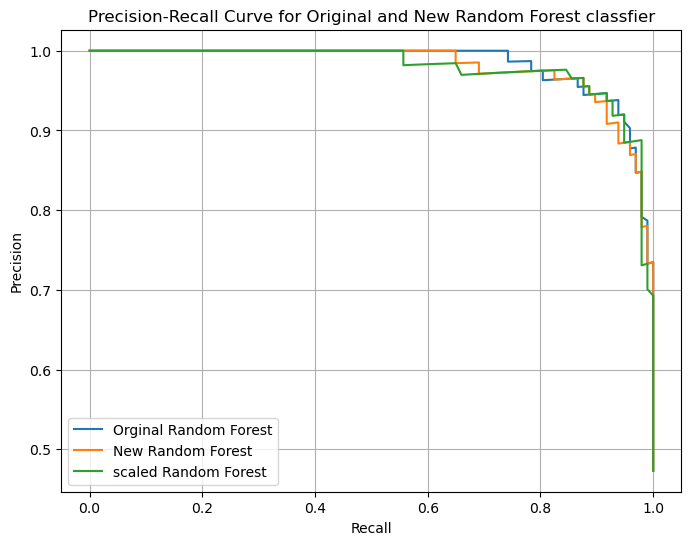

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have y_true and y_scores for both Classifier A and Classifier B
y_true_a, y_scores_a = y_train, y_scores_forest
y_true_b, y_scores_b = y_train, y_scores_forest_new
y_true_c, y_scores_c = y_train, y_scores_forest_scaled

# Calculate precision-recall curves for both classifiers
precision_a, recall_a, _ = precision_recall_curve(y_true_a, y_scores_a)
precision_b, recall_b, _ = precision_recall_curve(y_true_b, y_scores_b)
precision_c, recall_c, _ = precision_recall_curve(y_true_c, y_scores_c)

# Plot the precision-recall curves for both classifiers on the same graph
plt.figure(figsize=(8, 6))
plt.plot(recall_a, precision_a, label='Orginal Random Forest')
plt.plot(recall_b, precision_b, label='New Random Forest ')
plt.plot(recall_c, precision_c, label='scaled Random Forest ')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Original and New Random Forest classfier')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


    The x-axis represents recall (sensitivity), which is the fraction of true positives out of all actual positives.
    The y-axis represents precision, which is the fraction of true positives out of all predicted positives
    The curve typically starts at (0,1) and moves toward the upper-right corner
    
    High Precision:

        When precision is high, it means that most of the positive predictions made by the classifier are indeed correct.
        The curve will be closer to the upper-right corner of the plot.
        
    High Recall:

        When recall is high, it means that the classifier is capturing a large portion of actual positive samples.
        The curve will be closer to the upper-left corner of the plot
    


        The AUC-PR measures the overall performance of the classifier across different threshold values.
        A higher AUC-PR indicates better classifier performance.


# Error Analysis

In [71]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = y_pred_rf 
conf_mx = confusion_matrix(y_true, y_pred)
conf_mx

array([[38,  1],
       [ 4, 46]], dtype=int64)

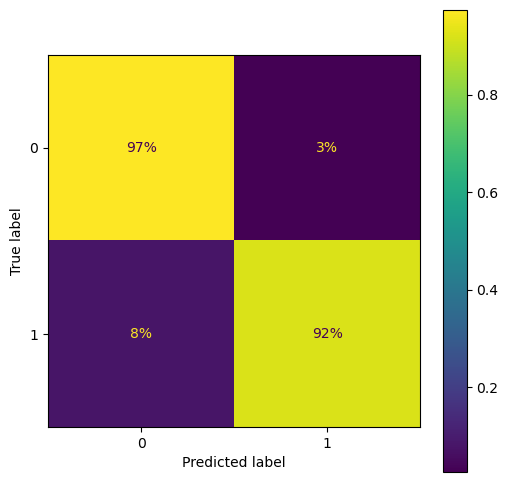

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                        normalize="true", values_format=".0%")
plt.show()

In [73]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = y_pred_rf_imp_Cols  
conf_mx = confusion_matrix(y_true, y_pred)
conf_mx

array([[39,  0],
       [ 4, 46]], dtype=int64)

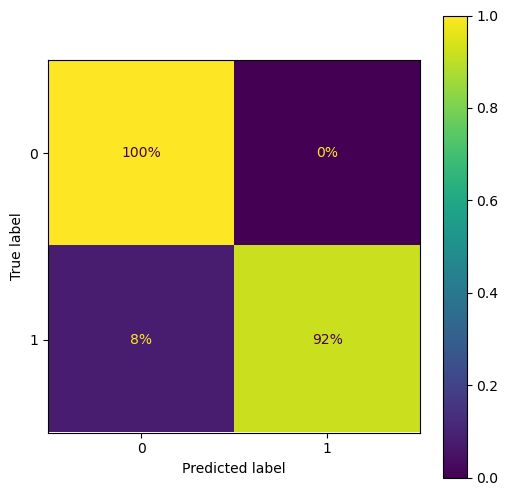

In [74]:
from sklearn.metrics import confusion_matrix
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                        normalize="true", values_format=".0%")
plt.show()


In [75]:
from sklearn.metrics import confusion_matrix
y_true = y_test 
y_pred = y_pred_rf_scaled
conf_mx = confusion_matrix(y_true, y_pred)
conf_mx

array([[38,  1],
       [ 4, 46]], dtype=int64)

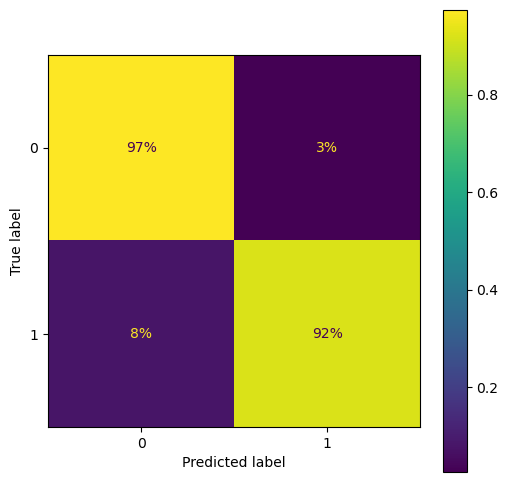

In [76]:
from sklearn.metrics import confusion_matrix
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                        normalize="true", values_format=".0%")
plt.show()


## from above analysis it looks like our df_imp models works the best

        lets tune it a bit

# HYPERPARAMETER TUNING

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## RandomizedSearchCV

    -For a problem related to Parkinson's disease detection using call recording, where correctly identifying positive cases is crucial (as missing them can have significant consequences), we should prioritize Recall as our scoring parameter in Randomized Search , but roc_auc will be more resonable ROC-AUC is a widely used metric for binary classification, and it provides a holistic view of the model's ability to discriminate between the positive and negative classes.However we have already made aur dataset balanced , So we will go with accuracy . Accuracy is easy to understand and interpret. It calculates the proportion of correctly classified instances out of the total dataset.




In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_features': randint(low=1, high=30),

    }

rnd_search = RandomizedSearchCV(ran_clf_imp_cols,n_jobs= -1 ,  param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='recall', random_state=42)
rnd_search.fit(X_train_imp, y_train)
rnd_search.best_score_

0.9078947368421053

In [79]:
rnd_search.best_params_

{'max_features': 4, 'n_estimators': 360}

## GridSearchCV

In [80]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50,60,70,100 ,500],          
    'min_samples_split': [2,6,8, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [ 1 , 4 ,6,8 ,10],         # Minimum number of samples required at each leaf node
    'max_samples':[50,100,150]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=ran_clf_imp_cols,n_jobs=-1 ,  param_grid=param_grid, scoring='recall', cv=5)

# Fit the GridSearchCV instance to the data
grid_search.fit(X_train_imp,y_train)

# Print the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score.round(4))

Best Hyperparameters: {'max_samples': 150, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Best Accuracy Score: 0.9179


**After hyperparameter tuning the best model so far is what we got after Randomised search , lets train it**

## training best model

In [81]:
best_rf_classifier = rnd_search.best_estimator_
#  fiting  model with the best hyperparameters on entire dataset
best_rf_classifier.fit(X_train_imp, y_train)


RandomForestClassifier(max_features=4, n_estimators=360, n_jobs=-1,
                       oob_score=True, random_state=42)

In [82]:
y_pred_rf_best = best_rf_classifier.predict(X_test_imp)

In [83]:
print("best_rf_classifier Classification Report:", "\n", classification_report(y_pred_rf_best , y_test ,target_names= ["Healthy","PD"] ))

best_rf_classifier Classification Report: 
               precision    recall  f1-score   support

     Healthy       1.00      0.93      0.96        42
          PD       0.94      1.00      0.97        47

    accuracy                           0.97        89
   macro avg       0.97      0.96      0.97        89
weighted avg       0.97      0.97      0.97        89



In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("precision_score",precision_score(y_test,y_pred_rf_best))
print("recall_score",recall_score(y_test,y_pred_rf_best))
print("f1_score",f1_score(y_test,y_pred_rf_best))
print("roc_auc_score",roc_auc_score(y_test,y_pred_rf_best))

precision_score 1.0
recall_score 0.94
f1_score 0.9690721649484536
roc_auc_score 0.97


### oob_score_

In [85]:
best_rf_classifier.oob_score_

0.9219512195121952

our oob score is decreased a bit from 0.94 to 0.92 , but thats fine , this generally tells that we have finally overcome some kind of overfitting

### cross_val Score

In [86]:
scores_for_best_rf = cross_val_score(best_rf_classifier , X_train_imp , y_train, cv=3, scoring='accuracy')
print("Cross_val_score score for original Random Forest :",scores_for_best_rf.mean().round(5))


Cross_val_score score for original Random Forest : 0.93187


woooa , Our cross val score improved from 0.927 to 0.931 . 

In [87]:
feature_importance_list = [(name, score*100) for name, score in zip(df_imp.columns, best_rf_classifier.feature_importances_)]

sorted_feature_importance_list = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
for name, score in sorted_feature_importance_list:
    print(name, ":", score)


MDVP:APQ : 13.283449583876692
spread1 : 12.574200455353884
MDVP:Fo(Hz) : 9.351062292582164
PPE : 9.16069493203734
Shimmer:APQ5 : 7.848873081748252
spread2 : 7.259772201864776
D2 : 6.98029761858993
MDVP:Shimmer : 6.898716275636452
Shimmer:DDA : 5.484548612459945
MDVP:Flo(Hz) : 5.180144025969797
MDVP:Jitter(Abs) : 4.339188430405828
MDVP:Jitter(%) : 3.2292144515459205
RPDE : 2.985610984481035
HNR : 2.8932989151926747
MDVP:PPQ : 2.5309281382553226


In [88]:
pd.DataFrame(feature_importance_list).sort_values(by=1 , ascending=False)

,0,1
6,MDVP:APQ,13.283450
0,spread1,12.574200
3,MDVP:Fo(Hz),9.351062
1,PPE,9.160695
8,Shimmer:APQ5,7.848873
2,spread2,7.259772
10,D2,6.980298
5,MDVP:Shimmer,6.898716
9,Shimmer:DDA,5.484549
4,MDVP:Flo(Hz),5.180144


## ExtraTreesClassifier

In [89]:
from sklearn.ensemble import ExtraTreesClassifier
ext_clf = ExtraTreesClassifier(n_estimators=100,min_samples_leaf=4,  min_samples_split= 2, random_state=42)
ext_clf.fit(X_train_imp , y_train)

ExtraTreesClassifier(min_samples_leaf=4, random_state=42)

In [90]:
y_ext_pred = ext_clf.predict(X_test_imp)
accuracy_score(y_ext_pred , y_test)

0.9550561797752809

### cross_val_score

In [91]:
scores_ext = cross_val_score(ext_clf , X_train_imp , y_train, cv=3, scoring='accuracy')
scores_ext.mean().round(3)

0.897

In [92]:
from sklearn.metrics import classification_report
print("ExtraTreesClassifier Classification Report:", "\n", classification_report(y_ext_pred , y_test ,  target_names= ["Healthy","PD"] ))


ExtraTreesClassifier Classification Report: 
               precision    recall  f1-score   support

     Healthy       1.00      0.91      0.95        43
          PD       0.92      1.00      0.96        46

    accuracy                           0.96        89
   macro avg       0.96      0.95      0.95        89
weighted avg       0.96      0.96      0.95        89



In [93]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50,70 ,80 ,100, 500],          # Number of trees in the forest
    'min_samples_split': [2, 5, 8, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4 , 6 , 8],         # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]             # Whether to bootstrap samples when building trees
}

# Create a GridSearchCV instance
grid_search_2 = GridSearchCV(estimator=ext_clf, n_jobs=-1,param_grid=param_grid, scoring='recall', cv=5)

# Fit the GridSearchCV instance to the data
grid_search_2.fit(X_train_imp,y_train)

# Print the best hyperparameters and corresponding accuracy score
best_params_2 = grid_search_2.best_params_
best_score_2 = grid_search_2.best_score_

print("Best Hyperparameters:", best_params_2)
print("Best Accuracy Score:", best_score_2)

Best Hyperparameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 70}
Best Accuracy Score: 0.9589473684210527


In [94]:
best_ext_classifier = grid_search_2.best_estimator_
best_ext_classifier.fit(X_train_imp, y_train)


ExtraTreesClassifier(min_samples_split=5, n_estimators=70, random_state=42)

In [95]:
y_ext_pred_best = best_ext_classifier.predict(X_test_imp)

### cross_val_score

In [96]:
scores_best_ext = cross_val_score(best_ext_classifier , X_train_imp , y_train, cv=3, scoring='accuracy')
scores_best_ext.mean().round(3)

0.956

In [97]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
voting_clf = VotingClassifier(estimators=[
    ("random_clf" , best_rf_classifier),
       ("SVM" , SVC()),
    ("Log_reg" , LogisticRegression(penalty="l2"))
] ,voting='hard')

In [98]:
voting_clf.fit(X_train_imp , y_train)

VotingClassifier(estimators=[('random_clf',
                              RandomForestClassifier(max_features=4,
                                                     n_estimators=360,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=42)),
                             ('SVM', SVC()),
                             ('Log_reg', LogisticRegression())])

In [99]:
scores_voting_clf = cross_val_score(voting_clf , X_train_imp , y_train, cv=3, scoring='accuracy')
scores_voting_clf.mean().round(3)

0.898

In [100]:
y_VC_pred =voting_clf.predict(X_test_imp)

In [102]:
print("ExtraTreesClassifier voting classisifier Report:", "\n", classification_report(y_VC_pred , y_test ,  target_names= ["Healthy","PD"] ))


ExtraTreesClassifier voting classisifier Report: 
               precision    recall  f1-score   support

     Healthy       1.00      0.91      0.95        43
          PD       0.92      1.00      0.96        46

    accuracy                           0.96        89
   macro avg       0.96      0.95      0.95        89
weighted avg       0.96      0.96      0.95        89



In [115]:
modelss = [best_ext_classifier , best_rf_classifier , voting_clf]

In [116]:
X_train_imp.shape

(205, 15)

In [125]:
scores=[]
for model in modelss:
    scores.append(cross_val_score(model , X_train_imp , y_train , cv =3 , scoring='accuracy').mean())
    

In [134]:
pd.DataFrame(scores , columns=["model"])

,model
0,0.956238
1,0.931870
2,0.897627


## as  our prefernce is that we want good balance between all the scoring metrics so we'll go with best_rf_classifier rather than ExtraTreesClassifieror or any other which we had tuned using randomised search

In [103]:
best_rf_classifier

RandomForestClassifier(max_features=4, n_estimators=360, n_jobs=-1,
                       oob_score=True, random_state=42)

lets recall all our accuracies...

In [57]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming X_test and y_test are your test data
y_pred = best_rf_classifier.predict(X_test_imp)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred_rf_best)
precision = precision_score(y_test, y_pred_rf_best)
recall = recall_score(y_test, y_pred_rf_best)
f1 = f1_score(y_test, y_pred_rf_best)
scores_for_best_rf = cross_val_score(best_rf_classifier , X_train_imp , y_train, cv=3, scoring='accuracy')
cross_val_score = scores_for_best_rf.mean().round(5)
# Create a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score','cross val score'],
    'Value': [accuracy, precision, recall, f1 ,cross_val_score ]
})

# Print the DataFrame
metrics_df


NameError: name 'best_rf_classifier' is not defined

    last but not the least , lets try some neural nets
    
    -starting with classification MLP's and then Keras classification model with sequential API

## NEURAL NETS

#### in deep learning we will start with , basic MLPClassifier

In [46]:
from sklearn.neural_network import MLPClassifier

In [48]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_imp , y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)


In [49]:
mlp_class = MLPClassifier(hidden_layer_sizes=[15] , max_iter=10000 , random_state=42)
mlp_class.fit(X_train , y_train)
accuracy = mlp_class.score(X_valid,y_valid)
accuracy

0.9259259259259259

### now , moving toward sequential API with Keras and tensorflow

In [66]:
import tensorflow as tf

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300 , activation="relu"),
    tf.keras.layers.Dense(100 ,activation="relu"),
    tf.keras.layers.Dense(2 , activation = "softmax")
    
])

In [68]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy" , optimizer=optimizer , metrics=["accuracy"])

In [69]:
history = model.fit(X_train , y_train , epochs=30 , validation_data=(X_valid,y_valid))

Epoch 1/30
8/8 [==============================] - 1s 29ms/step - loss: 0.5365 - accuracy: 0.7046 - val_loss: 0.4981 - val_accuracy: 0.7778
Epoch 2/30
8/8 [==============================] - 0s 9ms/step - loss: 0.3920 - accuracy: 0.8017 - val_loss: 0.4548 - val_accuracy: 0.8519
Epoch 3/30
8/8 [==============================] - 0s 10ms/step - loss: 0.3157 - accuracy: 0.8608 - val_loss: 0.4118 - val_accuracy: 0.8519
Epoch 4/30
8/8 [==============================] - 0s 11ms/step - loss: 0.2710 - accuracy: 0.8861 - val_loss: 0.3607 - val_accuracy: 0.8519
Epoch 5/30
8/8 [==============================] - 0s 12ms/step - loss: 0.2277 - accuracy: 0.9156 - val_loss: 0.3393 - val_accuracy: 0.9259
Epoch 6/30
8/8 [==============================] - 0s 9ms/step - loss: 0.2066 - accuracy: 0.9241 - val_loss: 0.3006 - val_accuracy: 0.9259
Epoch 7/30
8/8 [==============================] - 0s 9ms/step - loss: 0.1842 - accuracy: 0.9325 - val_loss: 0.2788 - val_accuracy: 0.9259
Epoch 8/30
8/8 [==============

    The training loss and accuracy steadily improve over the epochs, which is a good sign. The loss decreases from 0.34 to 0.0123, and the accuracy increases from 0.8397 to 1.0000. This indicates that the model is learning and improving its performance on the training data.

In [70]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 37ms/step - loss: 0.0415 - accuracy: 1.0000


[0.04154909402132034, 1.0]

In [71]:
import pandas as pd
history_df=pd.DataFrame(history.history).join(pd.DataFrame(history.epoch , columns={"epocs":history.epoch})).set_index("epocs").rename_axis()
history_df

,loss,accuracy,val_loss,val_accuracy
epocs,,,,
0,0.536493,0.704641,0.498064,0.777778
1,0.391958,0.801688,0.454809,0.851852
2,0.315695,0.860759,0.411756,0.851852
3,0.270968,0.886076,0.360739,0.851852
4,0.227732,0.915612,0.339318,0.925926
5,0.206574,0.924051,0.300634,0.925926
6,0.184237,0.932489,0.278770,0.925926
7,0.165567,0.932489,0.263587,0.925926
8,0.152934,0.936709,0.228327,0.925926


<Axes: xlabel='Epoch'>

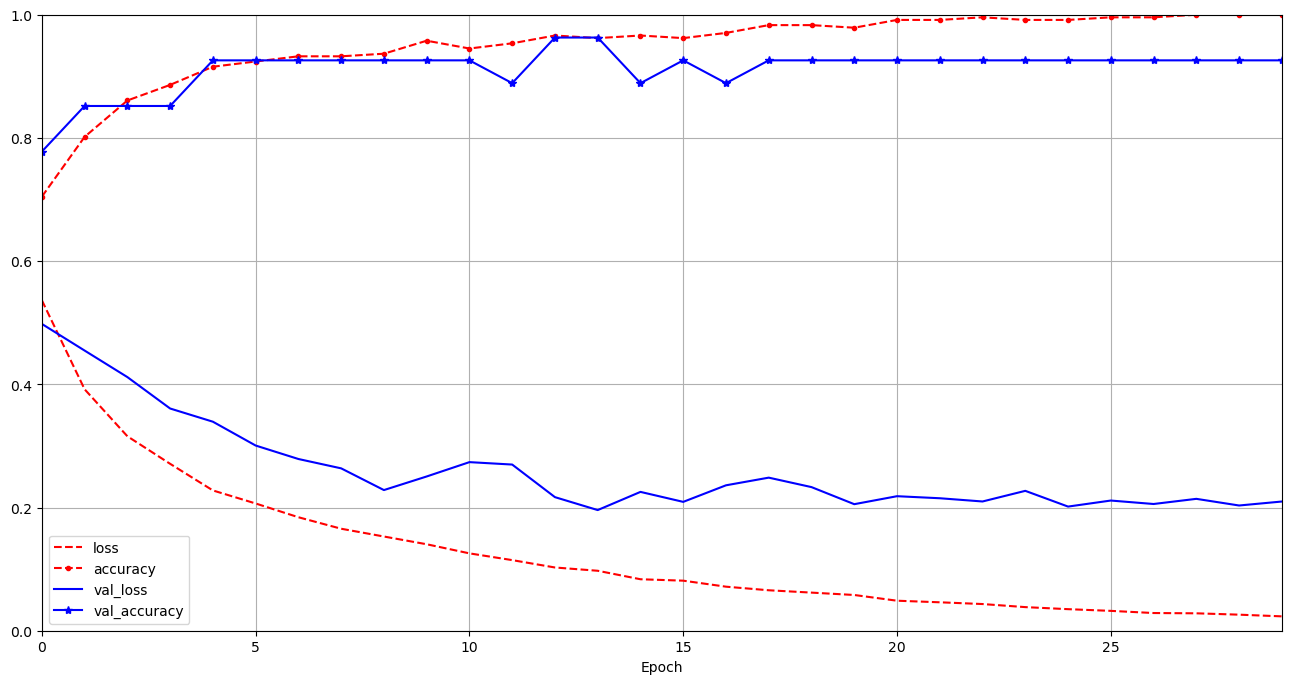

In [72]:
history_df.plot(figsize = (16,8) , xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch" , style=["r--", "r--.", "b-", "b-*"])

In [73]:
from sklearn.metrics import confusion_matrix
y_true = y_test 
y_pred = model.predict(X_test )


1/1 [==============================] - 0s 81ms/step


In [74]:
import numpy as np
# Define the threshold
threshold = 0.5

# Apply the threshold and create binary predictions for the positive class
positive_class_predictions = (y_pred[:, 0] >= threshold).astype(int)

# Create a confusion matrix focusing on the positive class
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true, positive_class_predictions)
print(confusion)


[[ 0 15]
 [15  0]]


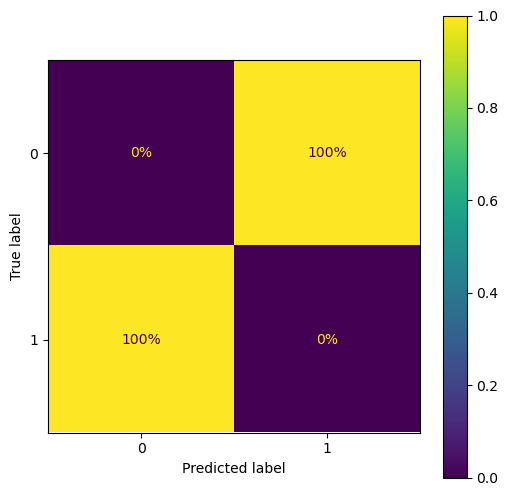

In [75]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_true, positive_class_predictions,
                                        normalize="true", values_format=".0%")
plt.show()


# Explanation Via LIME


In [76]:
import lime
from lime import lime_tabular

In [77]:
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train_imp), feature_names=X_train_imp.columns, 
            class_names=['healthy', 'Parkinson'] ,mode='classification')

NameError: name 'X_train_imp' is not defined

In [ ]:
explanation = lime_explainer.explain_instance(data_row=X_test_imp.iloc[1], predict_fn=best_rf_classifier.predict_proba, top_labels=6, num_features=13)

# printing out the explanation
explanation.show_in_notebook()

# Explanation Via SHAP

### Overview of SHAP Values and their Significance in Model Interpretability

    In machine learning, understanding how a model makes predictions is crucial for trust, accountability, and improvement. SHAP (SHapley Additive exPlanations) is a powerful method that enhances model interpretability by attributing the contribution of each feature to a model's prediction for a specific instance. Introduced by Lundberg and Lee in 2017, SHAP values are rooted in cooperative game theory and inspired by the work of Nobel laureate Lloyd Shapley.

#### Cooperative Game Theory:

    Cooperative game theory is concerned with how groups of individuals can work together to achieve a common goal. In this context, think of "players" as the model's features (or variables).

#### The Shapley Value:

    The Shapley value, derived from Lloyd Shapley's work, provides a fair way to allocate payoffs among players in a cooperative game.
    It calculates the average contribution of each player (feature) across all potential combinations of players.
    This involves assessing every possible combination of features and measuring the impact of each feature on the model's prediction when included in these combinations.
    By averaging these contributions across all possible feature arrangements, we achieve a balanced and interpretable evaluation of each feature's importance in the model's prediction.

#### Properties of SHAP Values:

Efficiency: The sum of all SHAP values quantifies how each feature affects the model's prediction. For instance, if the average prediction is 50 and the model predicts 60, the sum of all SHAP values for the features should equal 10, representing each feature's contribution to the difference.

Symmetry: Features that contribute equally to a prediction will have the same SHAP values, ensuring fairness in attributing importance.

Additivity: SHAP values can be added to show the joint contribution of several features to a prediction, helping understand the combined effect of multiple features on the model's output.

#### Advantages of SHAP Values:

Model Agnosticism: SHAP values can be applied to any machine learning model, including complex "black-box" models like deep neural networks, making it possible to choose accurate models without sacrificing interpretability.

Local Explanations: SHAP values provide instance-specific explanations, helping stakeholders understand the factors behind individual predictions, such as loan approvals or medical diagnoses.

Global Insights: Aggregating SHAP values across numerous instances enables comprehensive understanding of a model's behavior and key features driving predictions.

Fairness and Accountability: SHAP values help identify and quantify potential biases or unfair treatment within a dataset, allowing practitioners to mitigate them and ensure fairness in machine learning models.

#### SHAP Calculation:

Various algorithms are used to calculate SHAP values for different model types:

KernelSHAP: A model-agnostic method for any model. It employs a weighted linear regression technique to approximate Shapley values for each feature. It can handle high-dimensional datasets and is compatible with any model type.

TreeSHAP: Specifically designed for tree-based models (decision trees, random forests, gradient-boosted trees). It leverages the tree structure to efficiently calculate SHAP values and handle non-linear interactions between features.

DeepSHAP: Used to calculate SHAP values for deep neural networks. It combines the DeepLIFT method with the SHAP framework to provide interpretable explanations for complex deep learning models.

These techniques allow you to understand and interpret your machine learning models, making them more transparent, trustworthy, and fair. SHAP values are a significant advancement in the field of model interpretability, helping bridge the gap between complex models and human understanding.






In [ ]:
tree_explainer = shap.TreeExplainer(best_rf_classifier)
tree_shap_values = tree_explainer.shap_values(X_test_imp)
shap.initjs() #initialize javascript in cell

AttributeError: Exception encountered when calling layer 'sequential' (type Sequential).

'tuple' object has no attribute 'rank'

Call arguments received by layer 'sequential' (type Sequential):
  • inputs=       spread1       PPE   spread2  MDVP:Fo(Hz)  MDVP:Flo(Hz)  MDVP:Shimmer  \
0     2.059868  0.609129  0.922012    -0.878447     -0.249591      1.199087   
1    -1.014154 -0.832410 -0.818079     0.495578     -1.158497     -0.158399   
2     1.461230  1.767082  0.433381    -0.009220     -1.521103      0.742484   
3    -1.503679 -1.336705 -0.308172     2.379295      1.526629     -1.407297   
4     0.046050  0.057898  0.374697    -0.822638      0.140047     -0.807919   
...        ...       ...       ...          ...           ...           ...   
3095  0.946749  0.754666  0.932746    -0.994643     -0.252078      1.328591   
3096  0.728247  0.707785  0.429979     1.172454      1.435046      1.878863   
3097 -0.889620 -0.737806 -0.898249     0.688598     -1.031469     -0.086197   
3098  0.438117  0.405275 -0.019934    -0.432873     -1.522554      1.223075   
3099 -1.206008 -1.155279 -1.495672     2.146686      2.184622     -0.940080   

      MDVP:APQ       HNR  Shimmer:APQ5  Shimmer:DDA        D2  \
0     0.650412 -0.636774      0.639919     1.178612  1.526237   
1    -0.338694 -0.906799     -0.160103    -0.058973  0.780338   
2     1.233661 -0.985405      0.810207     0.409696  0.937320   
3    -1.509390  1.114313     -1.249975    -1.303133 -0.925089   
4    -0.710467  0.679600     -0.815258    -0.894166 -1.380353   
...        ...       ...           ...          ...       ...   
3095  1.267790 -1.164138      1.401763     1.357065  0.760931   
3096  2.057367 -1.562380      1.823837     1.689110  1.383877   
3097 -0.290245 -0.841286     -0.082866     0.033225  0.842983   
3098  1.088732 -0.751172      0.869827     1.267563  0.682134   
3099 -1.218019  0.712673     -0.926530    -0.750020 -0.041973   

      MDVP:Jitter(Abs)      RPDE  MDVP:PPQ  MDVP:Jitter(%)  
0             2.079205  1.273322  1.598742        2.194961  
1             1.192807 -0.877441  1.183894        1.693353  
2             0.530058  1.558618  0.795868        0.852673  
3            -2.242346  1.078675 -1.578720       -1.787192  
4            -0.190254  0.940483 -0.580536       -0.761660  
...                ...       ...       ...             ...  
3095          0.215405  1.223310  0.166513       -0.045520  
3096          1.192807 -0.683951  2.103236        2.006102  
3097          0.876365 -0.824239  0.925072        1.341990  
3098          1.004516  0.431768  0.899596        1.105528  
3099         -1.887969 -0.648668 -1.222863       -1.445670  

[3094 rows x 15 columns]
  • training=None
  • mask=None

In [120]:
np.shape(tree_shap_values) # X_test_imp.shape = (89,15) note: shap values works differently for multiclass classification problem

(2, 89, 15)

(2, 89, 15) shape indicates that you have SHAP values calculated for 89 instances, 15 features, and 2 classes

   
   `Positive Values:`

        Positive SHAP values indicate that a feature pushed the prediction toward a higher value (i.e., the model's prediction is larger due to this feature).
        The larger the positive SHAP value, the more influence the feature had in increasing the prediction.
        
    
   `Negative Values`

        Negative SHAP values indicate that a feature pushed the prediction toward a lower value (i.e., the model's prediction is smaller due to this feature).
        The more negative the SHAP value, the more influence the feature had in decreasing the prediction.
        
   `Magnitude of Values`

        The magnitude (absolute value) of SHAP values indicates the overall impact of a feature.
        Larger magnitude SHAP values suggest that the corresponding feature had a substantial influence on the prediction, regardless of whether it was positive or negative.

#### Explaining single prediction
    Let’s start small and simple. With SHAP, we can generate explanations for a single prediction. The SHAP plot shows features that contribute to pushing the output from the base value (average model output) to the actual predicted value.

    Red color indicates features that are pushing the prediction higher, and blue color indicates just the opposite.

**We will examine the first sample in the testing set to determine which features ` to the "0 (healthy )" result. To do this, we will utilize a force plot and provide the expected value, SHAP value, and testing sample.**




In [121]:
i=0
shap.initjs() #initialize javascript in cell
shap.force_plot(tree_explainer.expected_value[0], tree_shap_values[0][i,:], X_test_imp.values[i], feature_names = X_test_imp.columns)


• `explainer.expected_value[0]` is the expected value of the model's prediction.

• `shap_values[0][0,:]` is the SHAP values for the first instance in the dataset.

• `X_test.values[i]` is the feature values for the first instance in the dataset.



**From the plot we can see:**


    1. The model predict_proba value: 0.96
    The base value: this is the value that would be predicted if we didn’t know any features for the current instance. The base value is the average of the model output over the training dataset (explainer.expected_value in the code). 
    In this example base value = 0.5251

    2. The numbers on the plot arrows are the value of the feature for this instance. spred1 = -1.85 and D2 = -2.1983
    
    3.The features that were important to making the prediction for this observation are shown in red and blue, with red representing features that pushed the model score higher, and blue representing features that pushed the score lower. Higher scores lead the model to predict 1 and lower scores lead the model to predict 0
    
    4. The bigger the arrow, the bigger the impact of the feature on the output. The amount of decrease or increase in the impact can be seen on the x-axis.
    5.So this particular instance was ultimately classified as not healthy, because they were pushed higher by all the factors shown in red 


In [122]:
# Summarize the SHAP values
shap.summary_plot(tree_shap_values ,feature_names = df1.columns  )

In [123]:
# Optionally, you can also print the expected value (base value) of the model
print("Expected Value (Base Value):", tree_explainer.expected_value)


Expected Value (Base Value): [0.52509485 0.47490515]


summary plot for specific class 

In [124]:
shap.summary_plot(tree_shap_values[0], X_test_imp.values, feature_names = X.columns )
shap.initjs()

    Color Gradient: The color of each dot represents the value of the corresponding feature. Typically, it goes from low (e.g., blue) to high (e.g., red), helping you understand the range of values for each feature.



#### Interpreting the SHAP Summary Plot:

    The plot helps you understand which features have the most significant impact on your model's predictions. Features with dots that are far to the right (high SHAP values) have a substantial positive impact on predictions, while those far to the left (low SHAP values) have a substantial negative impact.

    Features with dots close to the center (around 0 SHAP value) have a more neutral or minimal influence,
    By looking at the distribution of SHAP values for each feature, you can determine the variability and importance of those features in your model.


### WaterFall Plot

In [125]:
row = 11
shap.waterfall_plot(shap.Explanation(values=tree_shap_values[0][row], 
                                              base_values=tree_explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()) , max_display = 12)

    base_values = f(x) = 0.525
    Longer bars indicate a larger impact on the prediction, whether positive or negative.
    with the most influential features at the top and the least influential at the bottom.

### multiple force plot


In [126]:
shap.initjs() #initialize javascript in cell
shap.force_plot(tree_explainer.expected_value[0], tree_shap_values[1],feature_names = X_test_imp.columns)


In [127]:
# If we pass a numpy array instead of a data frame then we
# need pass the feature names in separately
shap.dependence_plot(1, tree_shap_values[0], X_test_imp.values, feature_names=X_test_imp.columns) # 2 is the index of the feature to plot


    -The x-axis is the actual value from the dataset.
    -The y-axis is the SHAP value for that feature, which represents how much knowing that feature’s value changes the output of the model for that sample’s prediction.
    
    -The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically). If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring.
